## ABOUT DATASET


* Airbnb, çevrim içi bir platform aracılığıyla konaklama birimleri kiralama hizmeti sunan bir şirkettir. Kullanıcılar, kendi evlerini veya dairelerini, oda veya evleri kiralayabilirler. Bu kiralama işlemi genellikle turistler veya seyahat edenler arasında popülerdir ve birçok büyük şehirde birçok farklı kiralama listesi bulunmaktadır.



### Değişkenler

* ID: Kiralama biriminin benzersiz kimlik numarası.
* name: Kiralama biriminin ismi veya açıklaması.
* neighbourhood	: Mahal/mahalle
* room_type: oda tipi ;Ev, daire, oda vb.
Misafir Sayısı: Kaç kişinin kalabileceği.
Yatak Odası Sayısı: Kaç yatak odası olduğu.
Banyo Sayısı: Kaç banyosu olduğu.
Konum: Kiralama biriminin semt veya mahalle adı.
* Price: Kiralama biriminin günlük, haftalık veya aylık fiyatı.
* reviews_per_month: Misafirler tarafından yapılan derecelendirmelerin ortalaması.
* number_of_reviews: Kiralama birimine yapılmış inceleme sayısı.
* host_id: Ev sahibinin kimlik numarası.
* host_name: Ev sahibinin adı veya takma adı.
* last_review: Son inceleme tarihi
* availability_365: 1 yıldaki kullanılabilirliği
* latitude: Evin/odanın enlemi
* longitude: Evin/odanın boylamı
* minimum_nights: Minimum kalınacak gece

## Analysis Content 

* 1.[Python Libraries](#1)
* 2.[data loading](#2)
* 3.[EDA](#3)
* 4.[data Preprocessing](#4)
* 5.[Modelling](#5) 
* 6.[LGBM](#6) 
* 7.[Conclusşon](#7)


<a id="1"></a>
## 1.Python Libraries

In [1]:
#Let's load the relevant libraries (İlgili kütüphaneleri yükleyelim);

import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## 2.Data Loading

In [2]:
df=pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


<a id="3"></a>
## 3.EDA

In [4]:
df.shape

(48895, 16)

In [85]:
# verisetimizde 48895 gözlem ve 16 tane öznitelik bulunmaktadır.

In [86]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [87]:
# Verisetimizdeki  kolon bilgilerine erişmiş olduk

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [89]:
# Verisetimiz hakkındaki genel bilgilere erişmiş olduk
# Verisetimiz,10 sayısal ve 6 kategorik değişkenden oluşmaktadır
# Verisetimizde eksik değerler bulunmaktadır,bunları daha sonra analiz edeceğiz
# Verisetimizin boyutu 6 mb civarındadır.

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [91]:
# Verisetimizin istatistiksel özetini getirmiş olduk,Verilerin her bir çeyrekteki konumu ,ortalama,medyan gibi bilgilere eriştik


In [92]:
# eksik değer sayılarını gözlemleyelim


df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [93]:
# her bir değişkende eksik değer olup olmadığını gözlemledik

In [94]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [17]:
# her bir değişkendeki benzersiz değer sayılarına eriştik

In [7]:
# bunları bir fonksiyon aracılığıyla da yazdırabiliriz

def summary(df):
        print("##################### Shape #####################")
        print(df.shape)
        print("##################### columns #####################")
        print(df.columns)
        print("##################### info #####################")
        print(df.info())
        print("##################### describe #####################")
        print(df.describe().T)
        print("##################### missing value query #####################")
        print(df.isna().sum())
        print("##################### nunique #####################")
        print(df.nunique())


In [19]:
summary(df)

##################### Shape #####################
(48895, 16)
##################### columns #####################
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
##################### info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-nul

In [95]:
# özet bilgileri  bu şekilde otomotikleştirmiş olduk,isterseniz eklemeler yapabilirsiniz.

In [96]:
# Model eğitiminde işimize yaramayacak öznitelikleri çıkaralım
# Örneğin ; Kiracının veya evsahibinin isminin İsmail veya ahmet olmasının oda fiyatına bir etkisi olmaayacaktır,aynı şekilde id de

In [5]:
df.drop(["id","name","host_id","host_name"],axis=1,inplace=True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# bu şekilde gereksiz sutunları kaldırmış olduk,şimdi hızlı bir şekilde verisetimizin son durumunu gözlemleyelim

summary(df)

##################### Shape #####################
(48895, 12)
##################### columns #####################
Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
##################### info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                        

In [99]:
# 2 özniteliğimizde eksik değer var,bağlantılı olabilerler eksik olan kolonlar

In [26]:
# bir takım analizler gerçekleştirelim;


In [30]:
df.sort_values("price",ascending=False).head(20)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
40433,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
12342,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
6530,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
30268,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
4377,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
29662,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,NaN,12,146
42523,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,NaN,1,364


In [31]:
# fiyatı en yüksek olan 20 odanın bilgilerine eriştik,şimdi en ucuzlarına bakalım

In [32]:
df.sort_values("price").head(20)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25796,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25634,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25433,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25753,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
23161,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25795,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
26841,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
25778,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
26866,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


In [33]:
df["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [34]:
# her bir mahaldeki oda sayısına bakmış olduk,en çok Manhattan da sonra Brooklyn         

In [35]:
df["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [44]:
# her bir oda tipinin sayısına eriştik,en çok apartman tarzı
# 3 farklı oda tipi var; apartman/ev,tek kişilik oda,ortak kullanılan ods

In [38]:
# inceleme sayılarını gözlemleyelim,en çok -en az inceleme alanlar hakkında bilgilere erişelim;

df.sort_values("number_of_reviews",ascending=False).head(25) # en çok

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [39]:
df.sort_values("number_of_reviews",ascending=True).head(25) # en az

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48894,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23
28711,Brooklyn,Clinton Hill,40.68381,-73.96786,Private room,55,2,0,NaN,NaN,1,0
15661,Brooklyn,Bedford-Stuyvesant,40.69186,-73.94038,Private room,30,80,0,NaN,NaN,1,0
40011,Queens,Long Island City,40.74779,-73.93820,Private room,60,2,0,NaN,NaN,1,0
7707,Manhattan,East Harlem,40.79372,-73.94316,Entire home/apt,200,30,0,NaN,NaN,1,0
28718,Manhattan,Harlem,40.82892,-73.95082,Private room,70,3,0,NaN,NaN,1,0
40004,Manhattan,Midtown,40.75318,-73.98649,Entire home/apt,300,3,0,NaN,NaN,1,0
40001,Brooklyn,Crown Heights,40.67686,-73.93159,Private room,45,14,0,NaN,NaN,1,30
28719,Manhattan,Greenwich Village,40.73506,-73.99743,Entire home/apt,400,7,0,NaN,NaN,1,0
7712,Brooklyn,Bedford-Stuyvesant,40.68828,-73.92056,Private room,40,1,0,NaN,NaN,1,0


In [40]:
# en çok inceleme sayısı 629 ,en az 0 bandında

In [42]:
# oda tipine göre istatistiksel özeti gözlemleyelim

df.groupby("room_type")["price","minimum_nights","availability_365"].describe().T

room_type               Entire home/apt  Private room  Shared room
price            count     25409.000000  22326.000000  1160.000000
                 mean        211.794246     89.780973    70.127586
                 std         284.041611    160.205262   101.725252
                 min           0.000000      0.000000     0.000000
                 25%         120.000000     50.000000    33.000000
                 50%         160.000000     70.000000    45.000000
                 75%         229.000000     95.000000    75.000000
                 max       10000.000000  10000.000000  1800.000000
minimum_nights   count     25409.000000  22326.000000  1160.000000
                 mean          8.506907      5.377900     6.475000
                 std          22.947336     16.292091    31.458825
                 min           1.000000      1.000000     1.000000
                 25%           2.000000      1.000000     1.000000
                 50%           3.000000      2.000000     1.000000
                 75%           5.000000      4.000000     3.000000
                 max        1250.000000    999.000000   999.000000
availability_365 count     25409.000000  22326.000000  1160.000000
                 mean        111.920304    111.203933   162.000862
                 std         129.802937    132.092065   151.347109
                 min           0.000000      0.000000     0.000000
                 25%           0.000000      0.000000     0.000000
                 50%          42.000000     45.000000    90.000000
                 75%         229.000000    214.000000   341.000000
                 max         365.000000    365.000000   365.000000

In [43]:
# apartman ev tarzı yapıların fiyatları daha yüksek,ortak kullanılan odalar en düşük,özel odalar orta düzeyde fiyata sahip

In [45]:
# oda tipine göre istatistiksel özeti gözlemleyelim

df.groupby("neighbourhood_group")["price","minimum_nights","availability_365"].describe().T

neighbourhood_group           Bronx      Brooklyn     Manhattan        Queens  \
price            count  1091.000000  20104.000000  21661.000000   5666.000000   
                 mean     87.496792    124.383207    196.875814     99.517649   
                 std     106.709349    186.873538    291.383183    167.102155   
                 min       0.000000      0.000000      0.000000     10.000000   
                 25%      45.000000     60.000000     95.000000     50.000000   
                 50%      65.000000     90.000000    150.000000     75.000000   
                 75%      99.000000    150.000000    220.000000    110.000000   
                 max    2500.000000  10000.000000  10000.000000  10000.000000   
minimum_nights   count  1091.000000  20104.000000  21661.000000   5666.000000   
                 mean      4.560953      6.056556      8.579151      5.181433   
                 std      15.631792     17.632726     24.050857     15.028725   
                 min       1.000000      1.000000      1.000000      1.000000   
                 25%       1.000000      2.000000      1.000000      1.000000   
                 50%       2.000000      3.000000      3.000000      2.000000   
                 75%       3.000000      5.000000      6.000000      3.000000   
                 max     365.000000    999.000000   1250.000000    500.000000   
availability_365 count  1091.000000  20104.000000  21661.000000   5666.000000   
                 mean    165.758937    100.232292    111.979410    144.451818   
                 std     135.247098    126.275775    132.677836    135.538597   
                 min       0.000000      0.000000      0.000000      0.000000   
                 25%      37.000000      0.000000      0.000000      2.000000   
                 50%     148.000000     28.000000     36.000000     98.000000   
                 75%     313.500000    188.000000    230.000000    286.000000   
                 max     365.000000    365.000000    365.000000    365.000000   

neighbourhood_group     Staten Island  
price            count     373.000000  
                 mean      114.812332  
                 std       277.620403  
                 min        13.000000  
                 25%        50.000000  
                 50%        75.000000  
                 75%       110.000000  
                 max      5000.000000  
minimum_nights   count     373.000000  
                 mean        4.831099  
                 std        19.727605  
                 min         1.000000  
                 25%         1.000000  
                 50%         2.000000  
                 75%         3.000000  
                 max       365.000000  
availability_365 count     373.000000  
                 mean      199.678284  
                 std       131.852000  
                 min         0.000000  
                 25%        78.000000  
                 50%       219.000000  
                 75%       333.000000  
                 max       365.000000

In [46]:
# en pahalı evler veya odalar Manhattan dadır

In [48]:
df[(df.price>2000) & (df.neighbourhood_group=="Manhattan")]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
946,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NaN,NaN,1,365
2018,Manhattan,East Village,40.72668,-73.98179,Entire home/apt,2500,30,15,2019-07-01,0.26,1,89
2698,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,2013-09-28,0.03,1,365
3537,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359
3695,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,NaN,NaN,6,364
45710,Manhattan,Hell's Kitchen,40.75535,-73.99502,Entire home/apt,2500,70,0,NaN,NaN,3,191
46533,Manhattan,Chelsea,40.73999,-73.99806,Entire home/apt,2995,30,1,2019-06-24,1.00,1,214
48043,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365


In [49]:
# fiyatı 2000 den fazla olan manhattan da evlere eriştik

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [9]:
# last_review için zaman serisi işlemi uygulayalım;

from datetime import datetime

df["last_review"] = pd.to_datetime(df.last_review)

df['year'] = df['last_review'].dt.year 
df['month'] = df['last_review'].dt.month 
df["day"]=df["last_review"].dt.day


In [10]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,10.0,19.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,5.0,21.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN,NaN,NaN
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,7.0,5.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,11.0,19.0


In [11]:
# şimdi last_review değişkenini silelim ,işimiz bitti bununla

df.drop("last_review",axis=1,inplace=True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018.0,10.0,19.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019.0,5.0,21.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,NaN,NaN,NaN
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019.0,7.0,5.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018.0,11.0,19.0


In [12]:
# Kategorik ve sayısal değişkenlerimizi analiz edebilmemiz için birer liste oluşturalım
# dikkat etmemiz gereken sayısal görünümlü kategorik ve kategorik görünümlü saysal değişkenler

In [13]:
df.nunique()

neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
year                                  9
month                                12
day                                  31
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  year                            38843 non-null  float64
 12  month                           

In [14]:
cat_list=[i for i in df.select_dtypes("object")]
num_list=[i for i in df.select_dtypes(["int64","float64"])]

In [15]:
cat_list

['neighbourhood_group', 'neighbourhood', 'room_type']

In [16]:
num_list

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'year',
 'month',
 'day']

<a id="4"></a>
## 4.Data preprocessing

In [109]:
# eksik değer problemini ele alalım

### Missing Values Query

In [110]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
year                              10052
month                             10052
day                               10052
dtype: int64

In [69]:
# eksik değerleri görselleştirelim,ilişki olup olmadığına bakalım;
# eksik değer görselleştirme kütüphanesi missingno yu kullanacağım

In [70]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import missingno as msno

<Axes: >

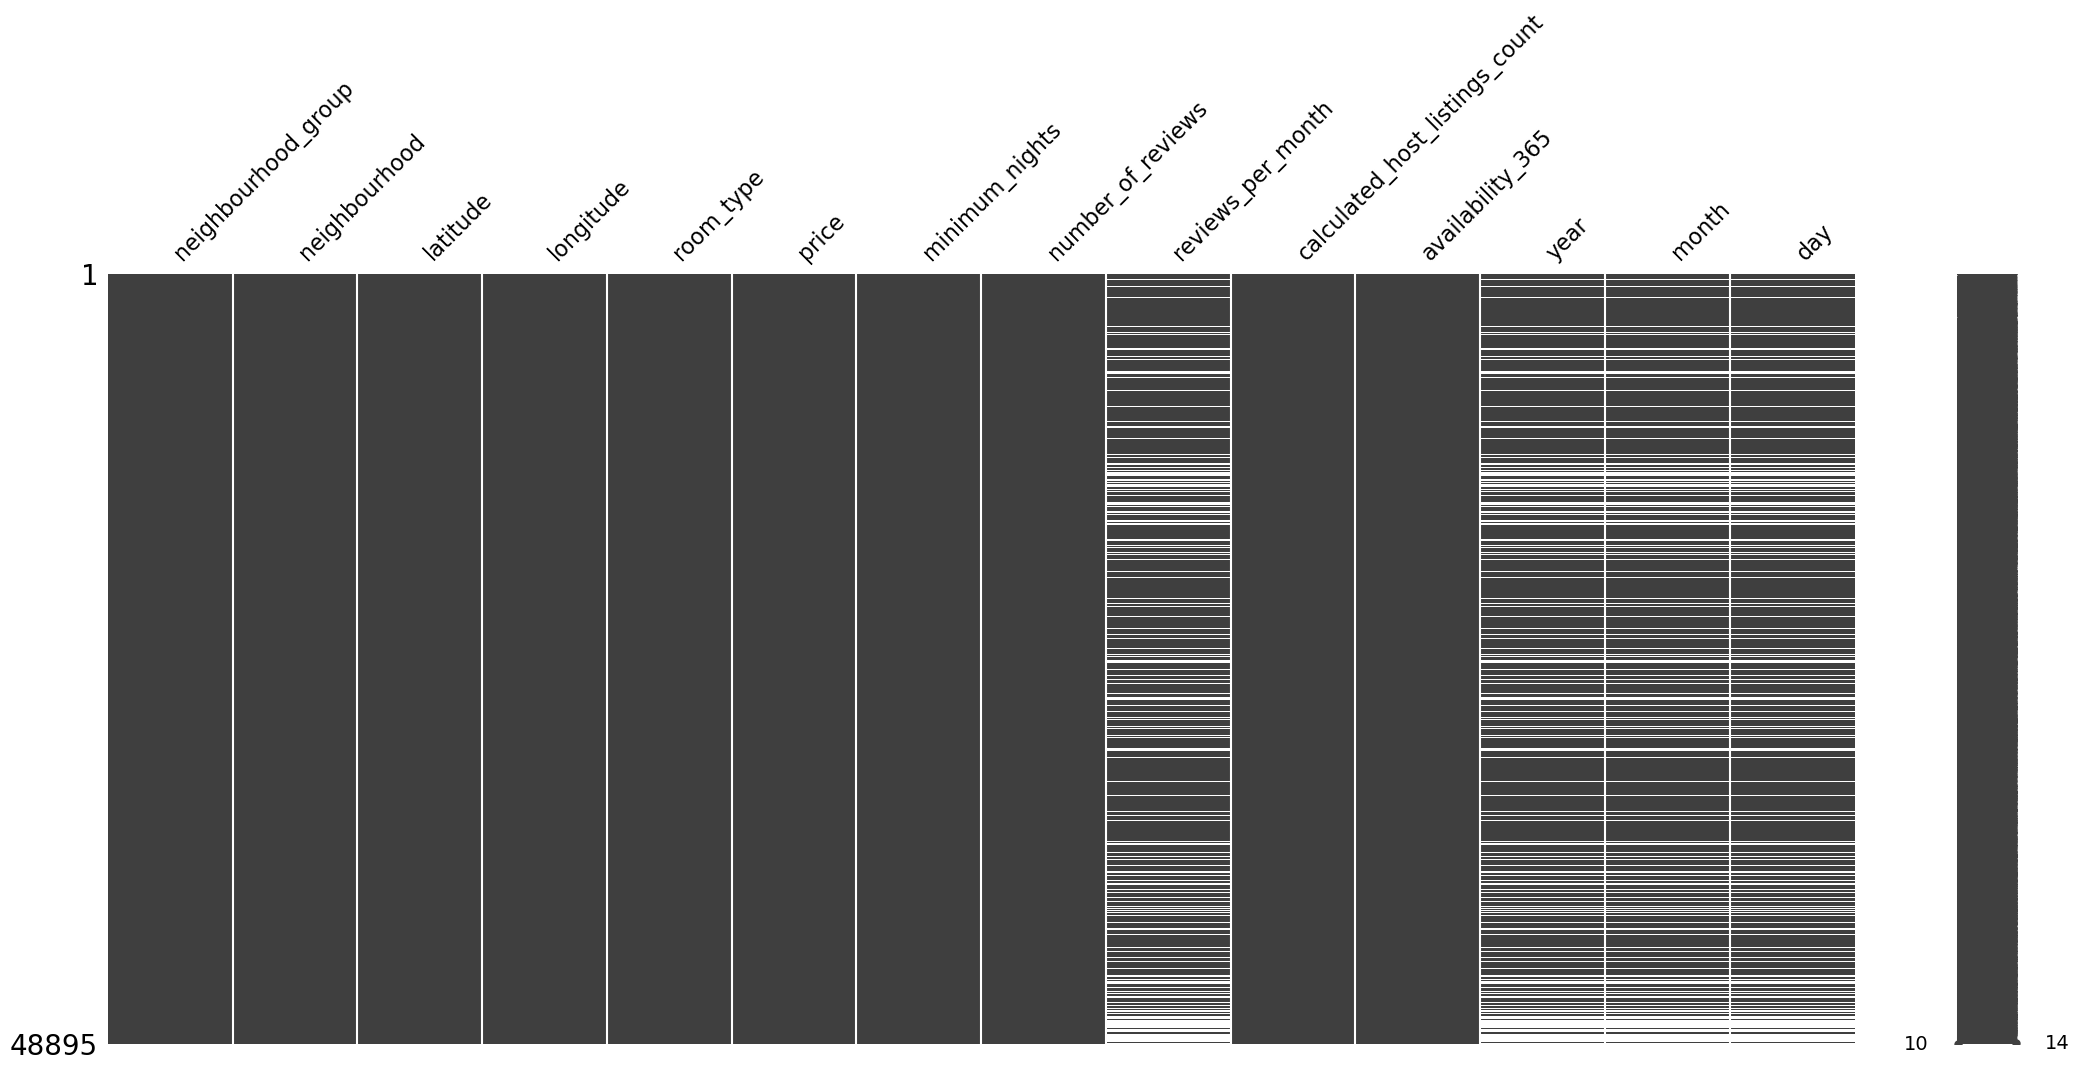

In [72]:
msno.matrix(df)

In [73]:
# görüldüğü gibi eksik değerler arasında bir bağlantı var,biri eksik iken diğerleri de eksik

<Axes: >

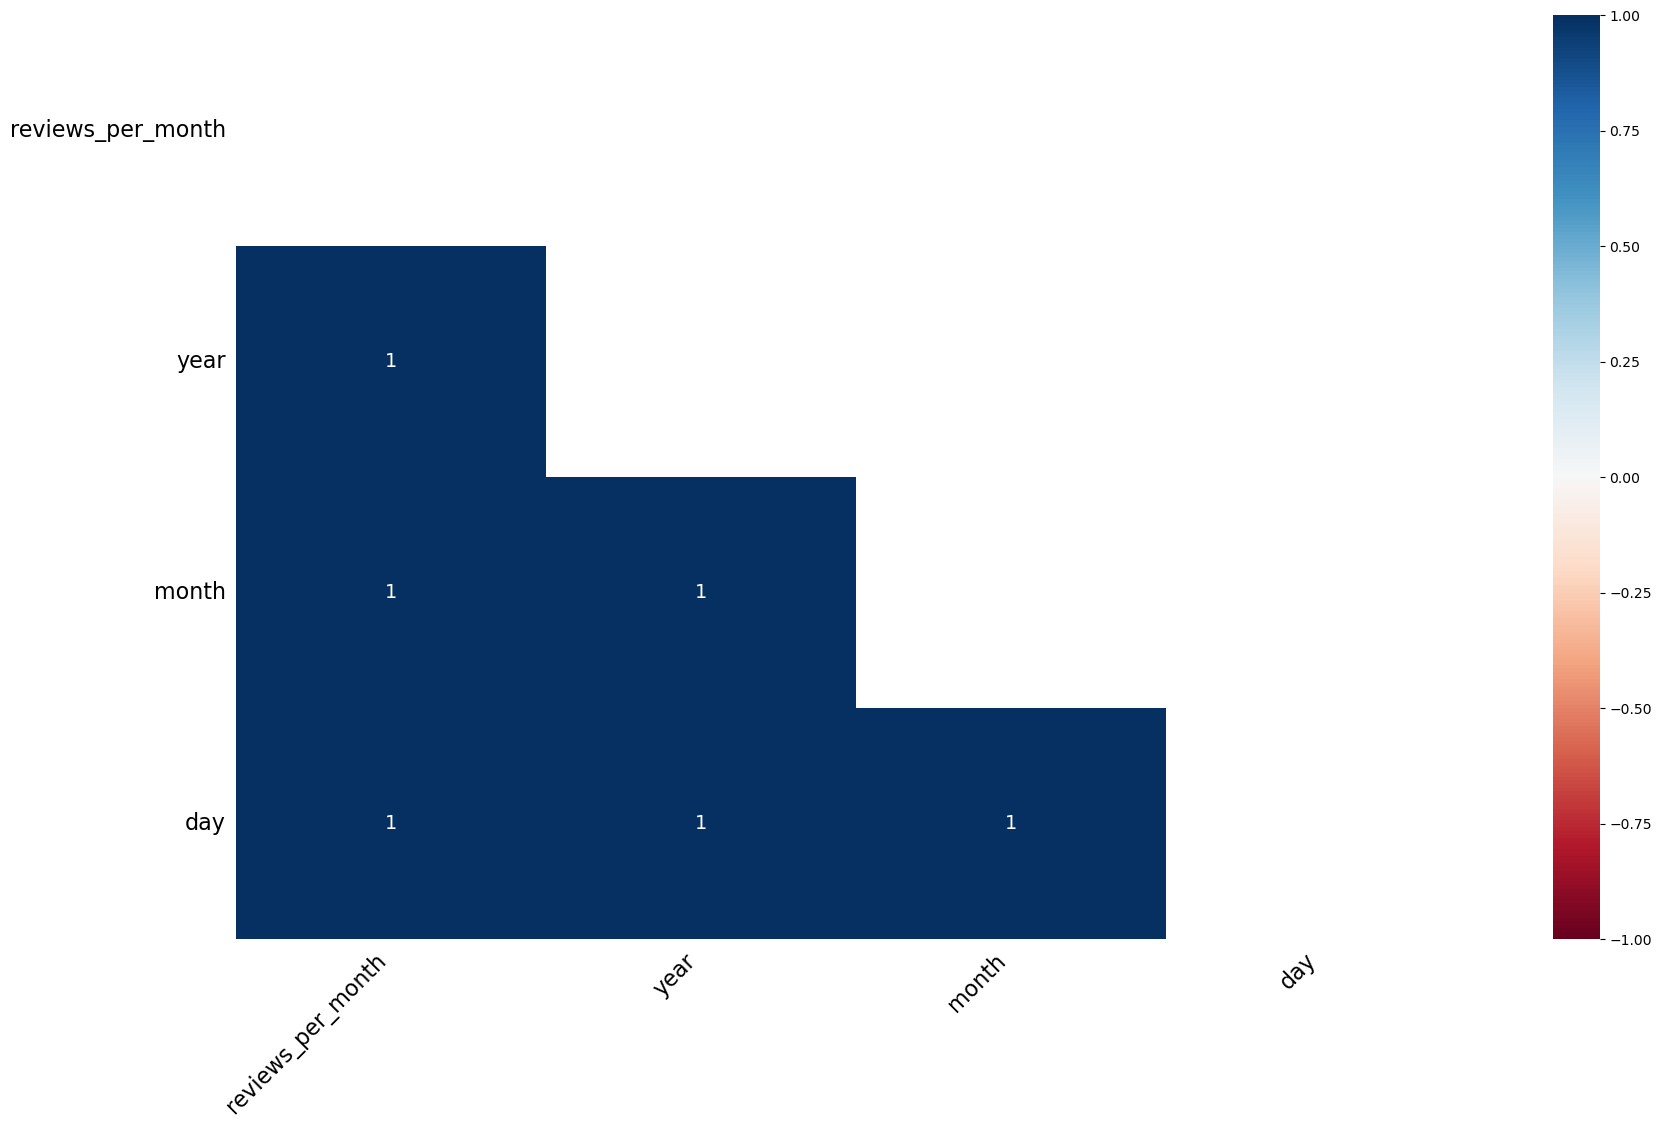

In [74]:
# korelasyonları ile gözlemleyelim;

msno.heatmap(df)

In [75]:
# görüldüğü gibi eksik değerler arasında yüzde yüz bir ilişki var

In [18]:
# eksik değerleri direk verisetinden atacağım

df=df.dropna()

In [19]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
year                              0
month                             0
day                               0
dtype: int64

In [20]:
# eksik değerleri gidermiş olduk

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             38843 non-null  object 
 1   neighbourhood                   38843 non-null  object 
 2   latitude                        38843 non-null  float64
 3   longitude                       38843 non-null  float64
 4   room_type                       38843 non-null  object 
 5   price                           38843 non-null  int64  
 6   minimum_nights                  38843 non-null  int64  
 7   number_of_reviews               38843 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  38843 non-null  int64  
 10  availability_365                38843 non-null  int64  
 11  year                            38843 non-null  float64
 12  month                           

In [116]:
# Aykırı değer analizlerini gerçekleştirelim

In [121]:
# sayısal değişkenlerin analizlerini gerçekleştirelim,görselleştirelim

### outlier value analysis

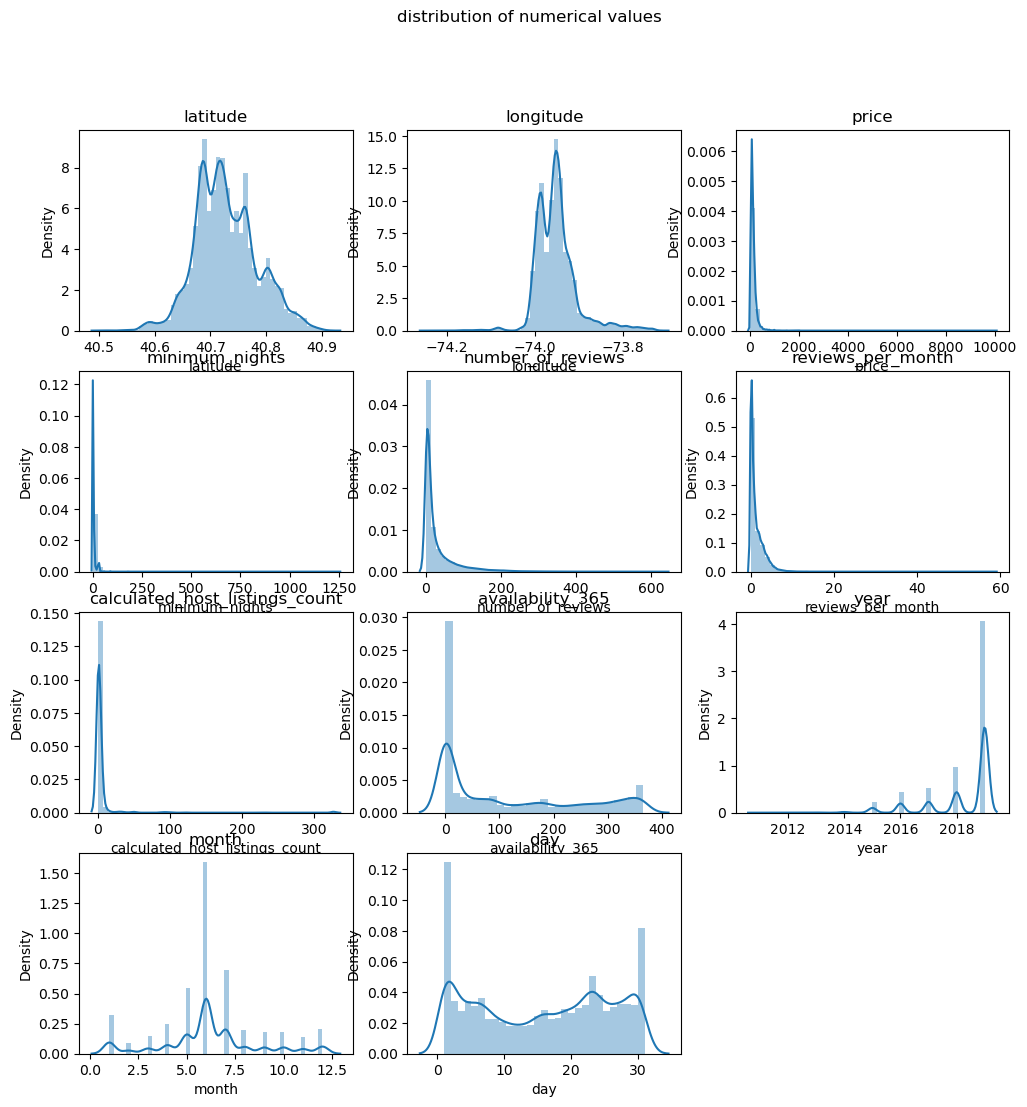

In [123]:
k=1
plt.figure(figsize=(12,12))
plt.tight_layout()
plt.suptitle("distribution of numerical values")


for i in df.loc[:,num_list]:
    plt.subplot(4,3,k)    
    sns.distplot(df[i])
    plt.title(i)
    k+=1

In [124]:
# dağılımlarımızda çarpıklık var,aykırı değerlerde var
# boxplot ile görsellleştirelim ,bakalım

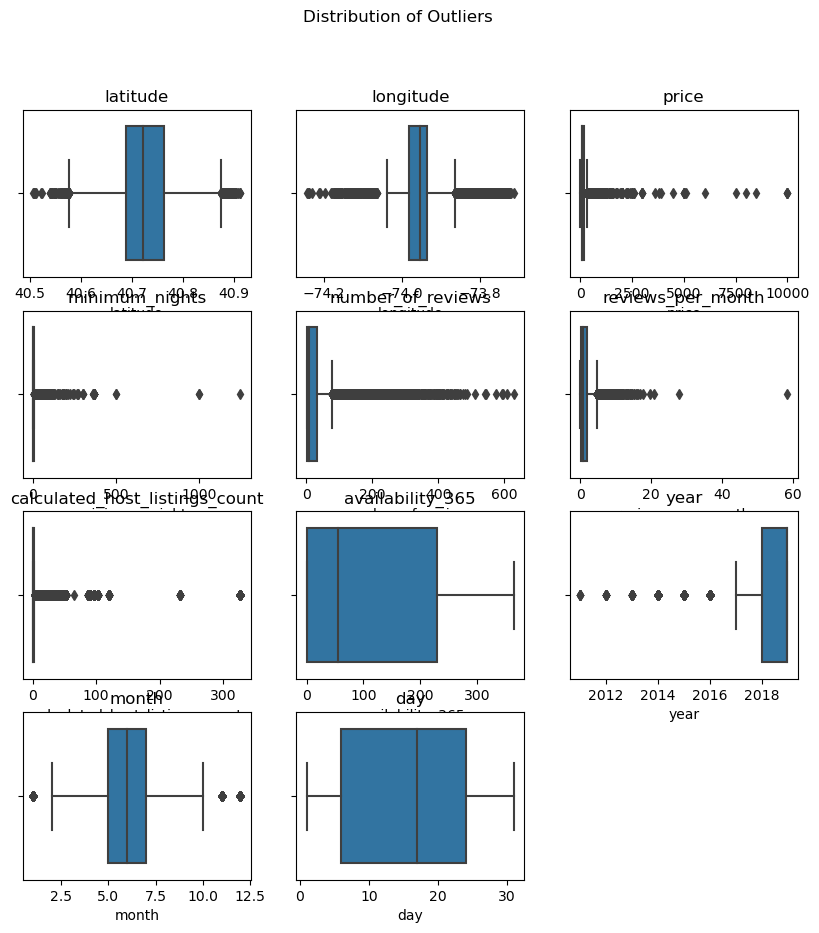

In [125]:
k=1
plt.figure(figsize=(10,10))
plt.suptitle("Distribution of Outliers")

for i in df.loc[:,num_list]:
    plt.subplot(4,3,k)
    sns.boxplot(x = i, data = df.loc[:,num_list])
    plt.title(i)
    k+=1

In [126]:
# görüldüğü gibi aykırı değerler çok fazla

In [23]:
# describe ile gözlemleyelim

df.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,10%,25%,35%,50%,65%,75%,90%,95%,max
latitude,38843.0,40.728134,0.054990,40.50641,40.66687,40.68864,40.70399,40.72171,40.74547,40.76299,40.805528,40.826059,40.91306
longitude,38843.0,-73.951148,0.046695,-74.24442,-73.99626,-73.98247,-73.96898,-73.95480,-73.94434,-73.93502,-73.906700,-73.862171,-73.71299
price,38843.0,142.317947,196.945624,0.00000,49.00000,69.00000,80.00000,101.00000,140.00000,170.00000,250.000000,330.000000,10000.00000
minimum_nights,38843.0,5.868059,17.384784,1.00000,1.00000,1.00000,2.00000,2.00000,3.00000,4.00000,14.000000,30.000000,1250.00000
number_of_reviews,38843.0,29.297557,48.186374,1.00000,1.00000,3.00000,5.00000,9.00000,20.00000,33.00000,84.000000,129.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.06000,0.19000,0.33000,0.72000,1.34000,2.02000,3.630000,4.640000,58.50000
calculated_host_listings_count,38843.0,5.164457,26.295665,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,5.000000,9.000000,327.00000
availability_365,38843.0,114.882888,129.543636,0.00000,0.00000,0.00000,4.00000,55.00000,152.00000,229.00000,333.000000,356.000000,365.00000
year,38843.0,2018.287722,1.181165,2011.00000,2016.00000,2018.00000,2018.00000,2019.00000,2019.00000,2019.00000,2019.000000,2019.000000,2019.00000
month,38843.0,6.173571,2.532065,1.00000,3.00000,5.00000,6.00000,6.00000,7.00000,7.00000,10.000000,11.000000,12.00000


In [26]:
# 5,95 quantile değerine göre aykırı değerleri sorgulayalım;

out_list=[]

for i in df.loc[:,num_list]:
    Q1 = df[i].quantile(0.05)
    Q3 = df[i].quantile(0.95)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        out_list.append(i)
        print(i,"yes")
        
    else:
        print(i, "no")


latitude no
longitude yes
price yes
minimum_nights yes
number_of_reviews yes
reviews_per_month yes
calculated_host_listings_count yes
availability_365 no
year yes
month no
day no


In [27]:
out_list

['longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'year']

In [28]:

for i in df.loc[:,out_list]:
    
    
    Q1 = df[i].quantile(0.05)
    Q3 = df[i].quantile(0.95)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR
    
    df.loc[df[i]>up_lim,i]=up_lim
    df.loc[df[i]<low_lim,i]=low_lim




In [29]:
# aykırı değerleri gidermiş olduk;
# gözlemleyelim;

df.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,10%,25%,35%,50%,65%,75%,90%,95%,max
latitude,38843.0,40.728134,0.054990,40.506410,40.66687,40.68864,40.70399,40.72171,40.74547,40.76299,40.805528,40.826059,40.91306
longitude,38843.0,-73.951145,0.046677,-74.214966,-73.99626,-73.98247,-73.96898,-73.95480,-73.94434,-73.93502,-73.906700,-73.862171,-73.71299
price,38843.0,137.039158,109.821046,0.000000,49.00000,69.00000,80.00000,101.00000,140.00000,170.00000,250.000000,330.000000,765.00000
minimum_nights,38843.0,5.412648,9.080920,1.000000,1.00000,1.00000,2.00000,2.00000,3.00000,4.00000,14.000000,30.000000,73.50000
number_of_reviews,38843.0,29.102000,46.700752,1.000000,1.00000,3.00000,5.00000,9.00000,20.00000,33.00000,84.000000,129.000000,321.00000
reviews_per_month,38843.0,1.369238,1.633740,0.010000,0.06000,0.19000,0.33000,0.72000,1.34000,2.02000,3.630000,4.640000,11.54000
calculated_host_listings_count,38843.0,2.499961,3.910245,1.000000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,5.000000,9.000000,21.00000
availability_365,38843.0,114.882888,129.543636,0.000000,0.00000,0.00000,4.00000,55.00000,152.00000,229.00000,333.000000,356.000000,365.00000
year,38843.0,2018.287812,1.180628,2011.500000,2016.00000,2018.00000,2018.00000,2019.00000,2019.00000,2019.00000,2019.000000,2019.000000,2019.00000
month,38843.0,6.173571,2.532065,1.000000,3.00000,5.00000,6.00000,6.00000,7.00000,7.00000,10.000000,11.000000,12.00000


### Data Visualize

In [31]:
# Kategorik değer analizi;

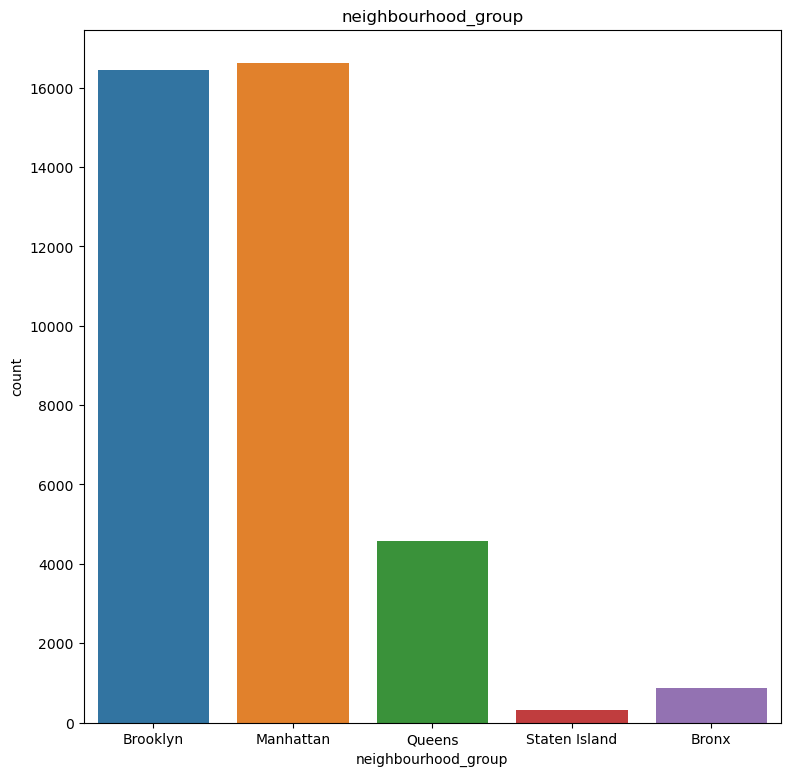

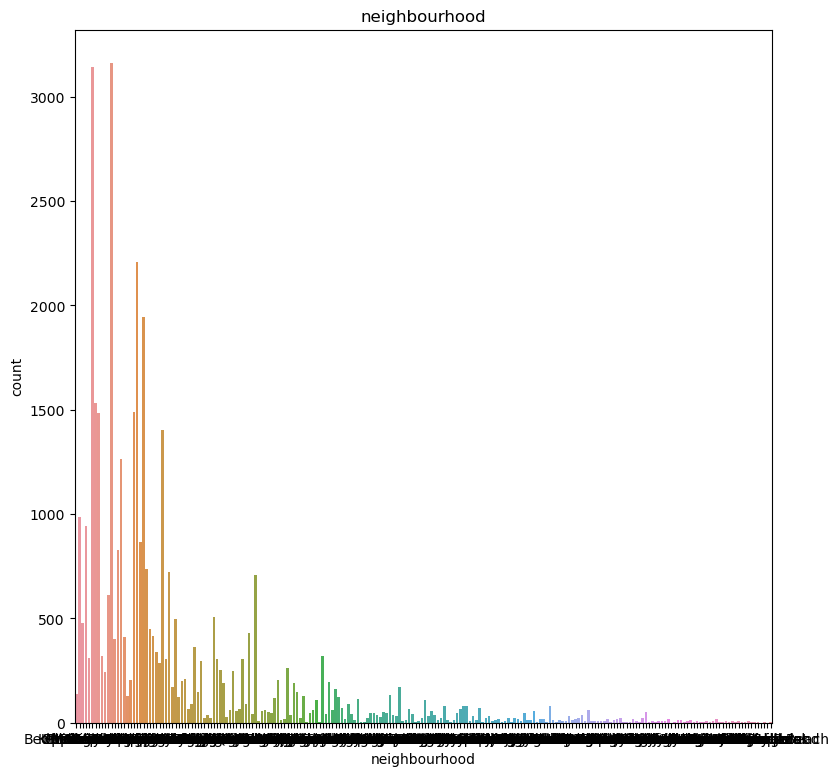

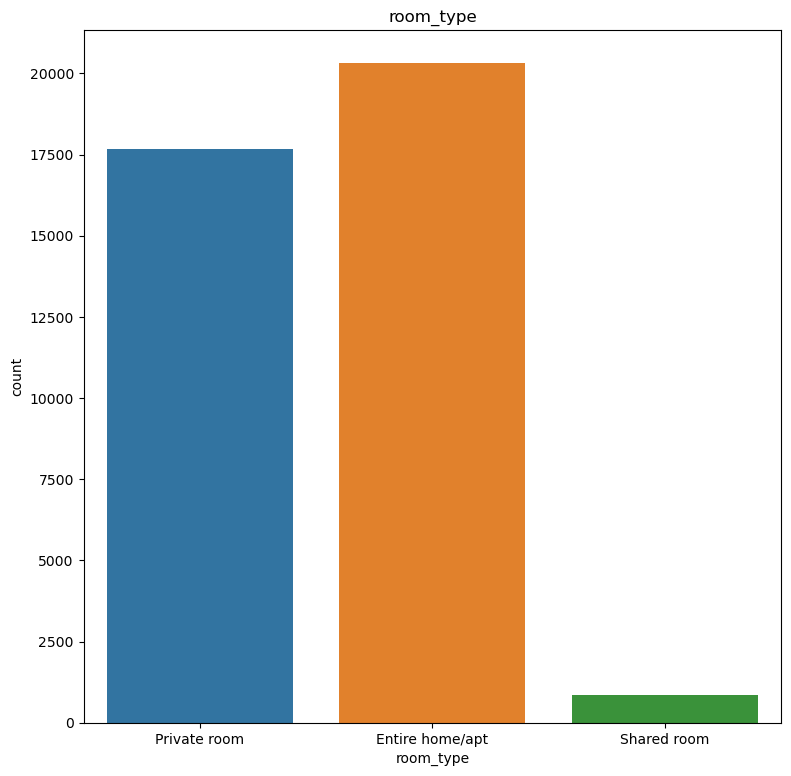

In [32]:
for i in cat_list:
    plt.figure(figsize=(9,9))
    sns.countplot(x=i,data=df.loc[:,cat_list])
    plt.title(i)

In [33]:
# sayısal değer

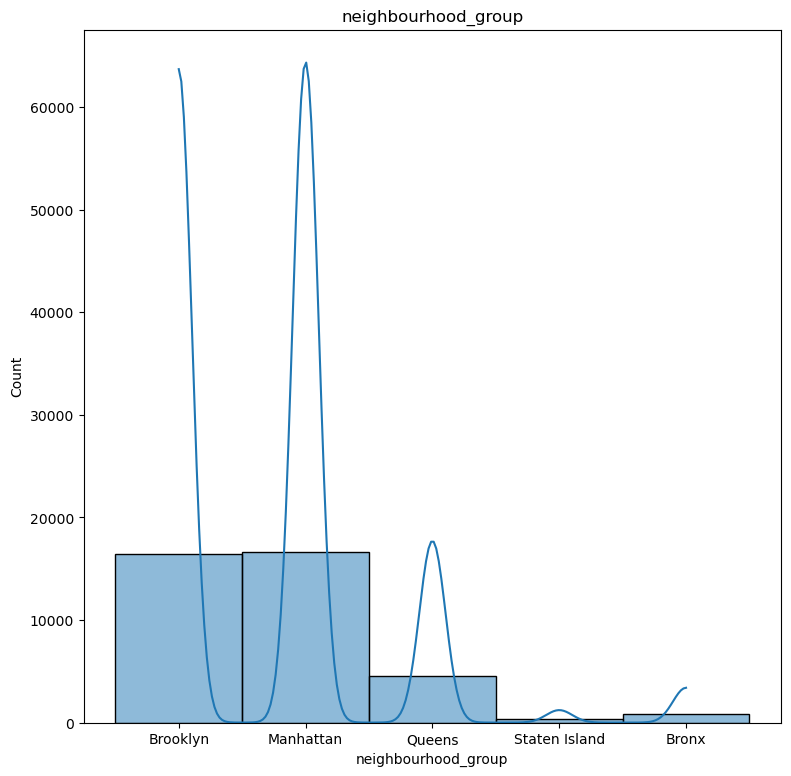

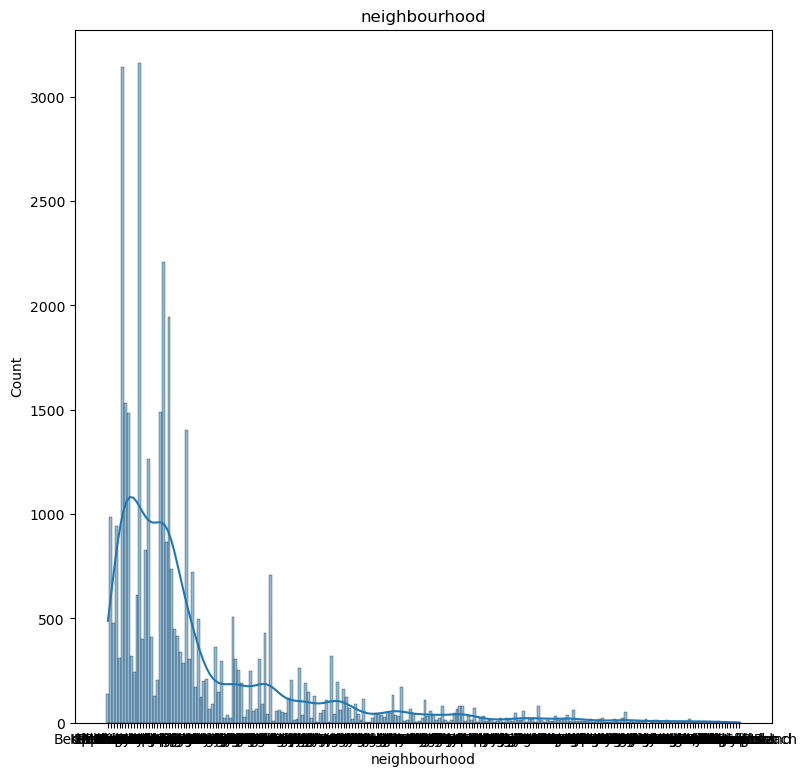

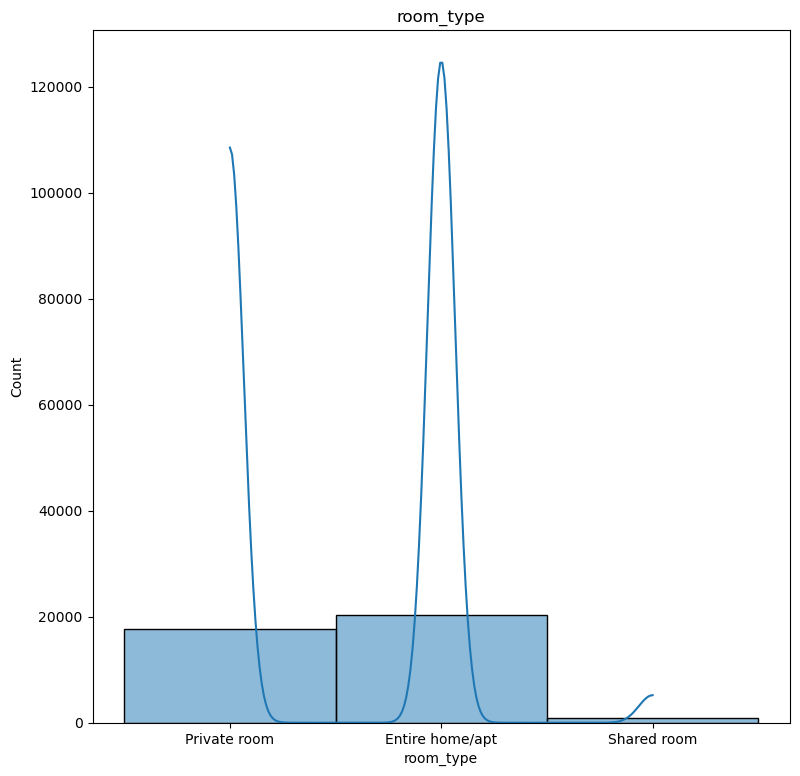

In [34]:
for i in cat_list:
    plt.figure(figsize=(9,9))
    sns.histplot(data=df[i],kde=True)
    plt.title(i)




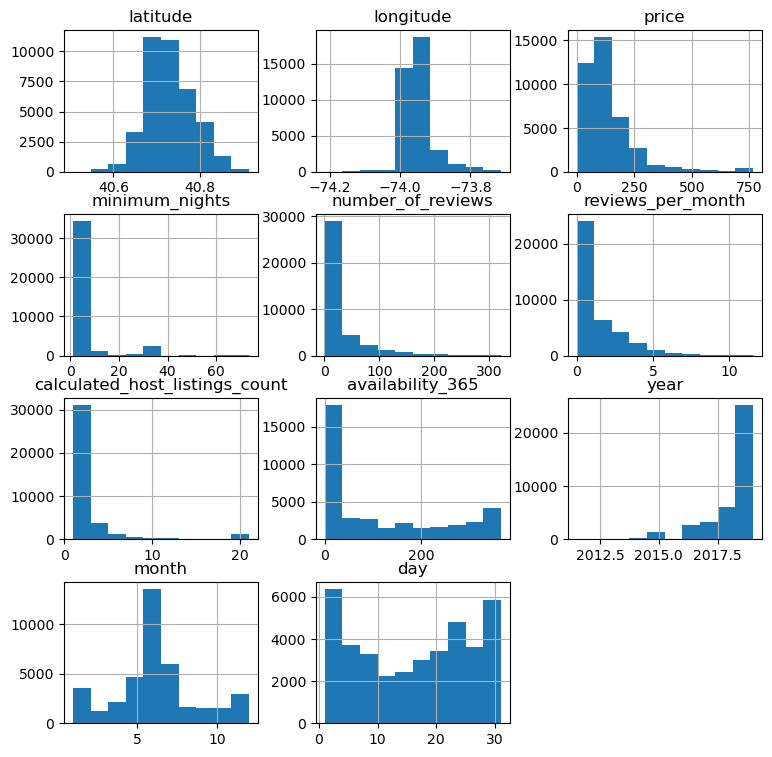

In [36]:
df.hist(figsize=(9,9));


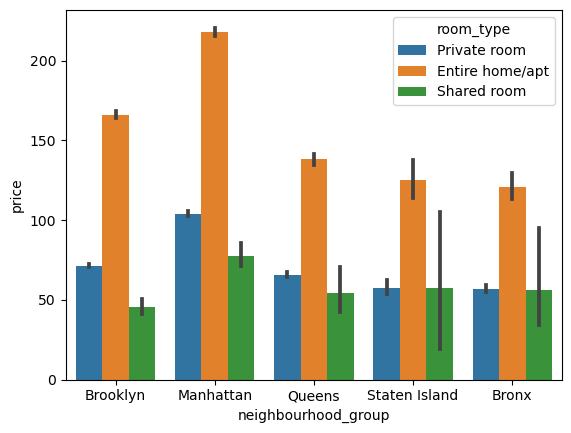

In [39]:
sns.barplot(x="neighbourhood_group", y="price",hue="room_type",data=df)
plt.show()

In [42]:
# 5 eyalette de en  pahalı apartman dairesi

<Axes: >

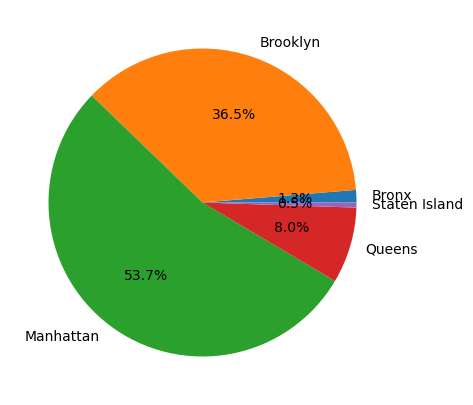

In [43]:
df.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))

In [44]:
# En pahalı % 53.7 ile Manhattan (genel olarak)

<Axes: >

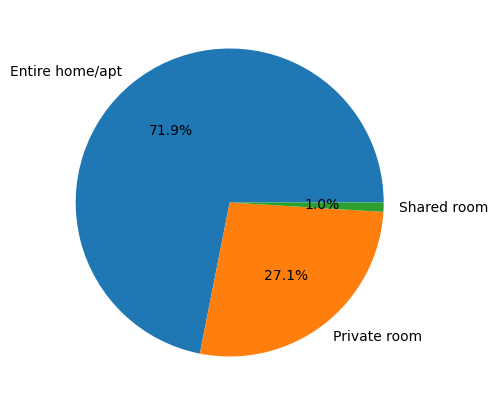

In [45]:
df.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))

In [46]:
# Apartman tarxı daire öne çıkıyor

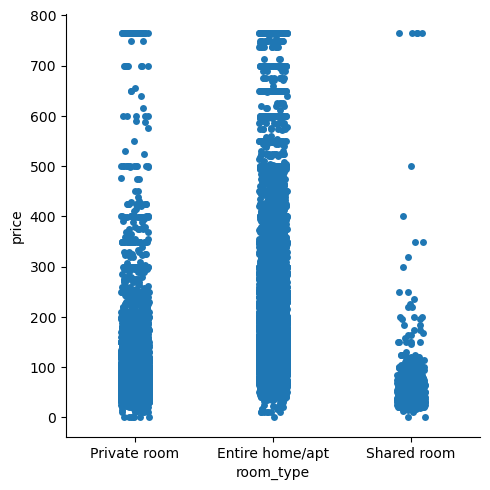

In [47]:
sns.catplot(x="room_type", y="price", data=df)


In [49]:
# çok kişilik odalar için gözlemlediğimizde fiyat aralığı genel olarak 400 altında yoğunlaşmış
# Apartman tarxı daireler yoğunluğu her noktada neredeyse aynı,ucuz olan da var,pahalı olanda
# özel odalar 500 altında nispeten daha yoğun

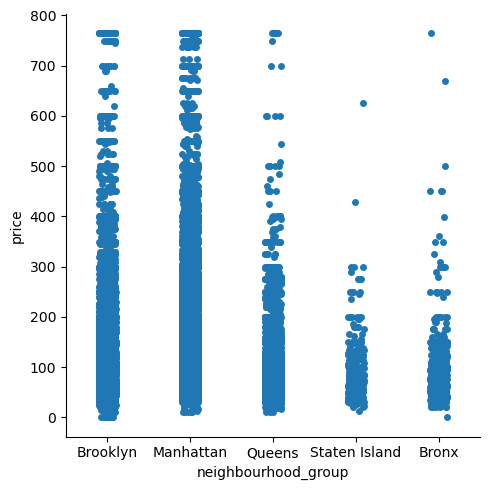

In [50]:
sns.catplot(x="neighbourhood_group", y="price", data=df)


In [51]:
# eyalet durumuna göre kırılımına baktığımızda 3 eyalette nispeten daha uygun evler (Quenns,Staten İslands,Bronx)

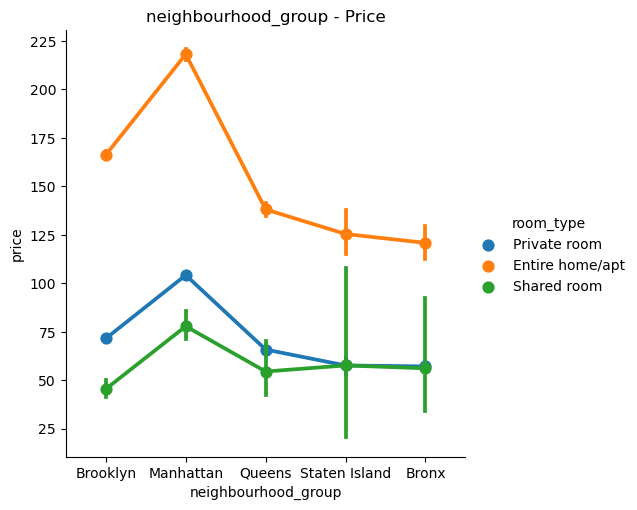

In [54]:
sns.catplot(x="neighbourhood_group", y="price", hue="room_type", kind="point", data=df)
plt.title("neighbourhood_group - Price");

In [55]:
# Eyalet ve fiystın oda tipine göre kırılımına baktığımızda Ev apartman tipi bariz bir şekilde daha pahalı

### Encoding

In [56]:
# Makine öğrenmesi modellerimizi eğitmeden önce bilgisayar diline çevirmemiz lazım;kategorik değerleri sayısala

In [59]:
df.select_dtypes("object").head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
5,Manhattan,Murray Hill,Entire home/apt


In [60]:
df.neighbourhood_group.value_counts()

Manhattan        16632
Brooklyn         16447
Queens            4574
Bronx              876
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [61]:
df.neighbourhood.value_counts()

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2206
Bushwick              1944
Hell's Kitchen        1532
                      ... 
Eltingville              2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64

In [62]:
df.room_type.value_counts()

Entire home/apt    20332
Private room       17665
Shared room          846
Name: room_type, dtype: int64

In [63]:
# ordinal ve nominal olma durumuna göre farklı encoding yöntemleri kullanabiliriz
# buradaki değişkenler nominal durumda

In [65]:
#ama rastgele bir şekilde dolduracağım

In [67]:
for i in cat_list:
    df[i] = df[i].factorize()[0]


In [68]:
df


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,0,0,40.64749,-73.97237,0,149,1.0,9,0.21,6,365,2018.0,10.0,19.0
1,1,1,40.75362,-73.98377,1,225,1.0,45,0.38,2,355,2019.0,5.0,21.0
3,0,2,40.68514,-73.95976,1,89,1.0,270,4.64,1,194,2019.0,7.0,5.0
4,1,3,40.79851,-73.94399,1,80,10.0,9,0.10,1,0,2018.0,11.0,19.0
5,1,4,40.74767,-73.97500,1,200,3.0,74,0.59,1,129,2019.0,6.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,1,27,40.78099,-73.95366,0,129,1.0,1,1.00,1,147,2019.0,7.0,7.0
48790,2,37,40.75104,-73.81459,0,45,1.0,1,1.00,6,339,2019.0,7.0,7.0
48799,3,161,40.54179,-74.14275,0,235,1.0,1,1.00,1,87,2019.0,7.0,7.0
48805,4,96,40.80787,-73.92400,1,100,1.0,2,2.00,1,40,2019.0,7.0,7.0


In [69]:
# encoding işlemlerimizi gerçekleştirmiş olduk

### Korelasyon Analizi

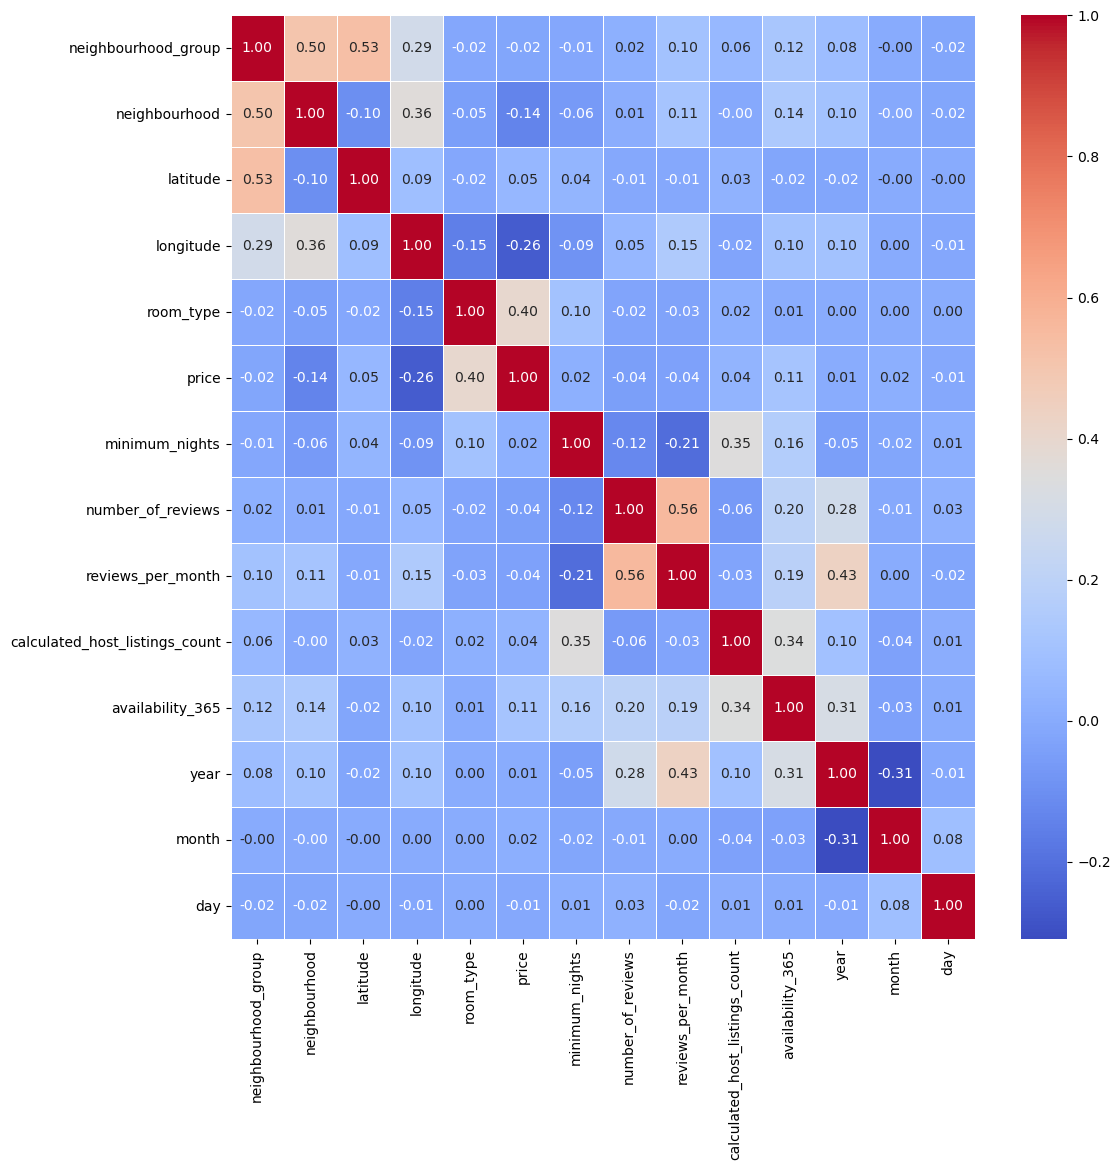

In [70]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()


In [71]:
## özniteliklerimiz arasında yüksek korelasyon ilişkisi yok

In [72]:
# hedef değişkenimize göre ilişkiyi gözlemleyelim

In [73]:
cor=df.corr()["price"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with price":cor.values})



,column,Correlation with price
0,price,1.000000
1,room_type,0.397884
2,availability_365,0.111359
3,latitude,0.050487
4,calculated_host_listings_count,0.035971
5,minimum_nights,0.018566
6,month,0.016484
7,year,0.007071
8,day,-0.009476
9,neighbourhood_group,-0.019320


In [74]:
# hedef değişkeni en çok etkileyen (fiyatı) (oda tipi) room_type

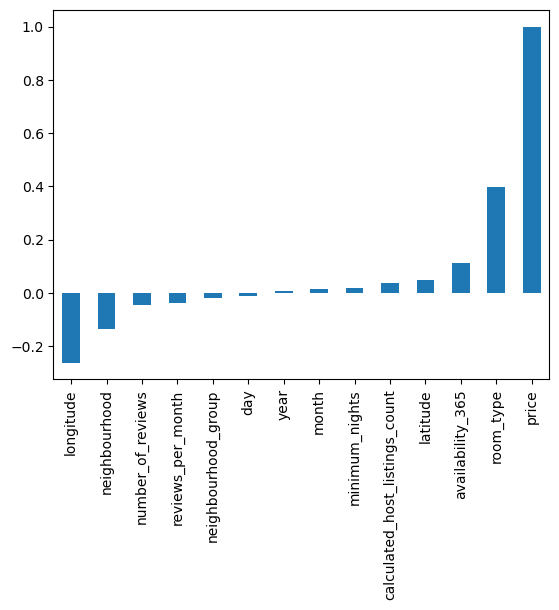

In [75]:
df.corr()["price"].sort_values().plot(kind="bar");


In [76]:
# Görselleştirmiş olduk
# room_type olumlu yönde etkiliyor,longitude olumsuz yönde etkiliyor fiyatı

<a id="5"></a>
## 5.Modelling

In [77]:
X=df.drop("price",axis=1)
y=df["price"]

In [78]:
# train-test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [79]:
X_train.shape

(31074, 13)

In [81]:
y_test.shape

(7769,)

In [82]:
# bazı kütüphanleri yükleyelim

In [83]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 101.0/101.0 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 799.9 kB/s eta 0:00:00


In [84]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.3/1.3 MB 2.0 MB/s eta 0:00:00


In [85]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 1.4 MB/s eta 0:00:00


In [86]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [87]:
# modellerimizi oluşturalım;

In [88]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
mlpc=MLPRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
Learning rate set to 0.070466
0:	learn: 106.5281486	total: 143ms	remaining: 2m 22s
1:	learn: 104.2284050	total: 156ms	remaining: 1m 17s
2:	learn: 102.2894335	total: 167ms	remaining: 55.4s
3:	learn: 100.4007676	total: 170ms	remaining: 42.3s
4:	learn: 98.7120712	total: 178ms	remaining: 35.4s
5:	learn: 97.3582221	total: 185ms	remaining: 30.6s
6:	learn: 96.0443201	total: 190ms	remaining: 27s
7:	learn: 94.8261451	total: 195ms	remaining: 24.2s
8:	learn: 93.8574096	total: 200ms	remaining: 22s
9:	learn: 92.9458201	total: 203ms	remaining: 20.1s
10:	learn: 92.1255746	total: 206ms	remaining: 1

In [ ]:
# değerlendirme ölçütü olarak rmse kullanacağım

In [91]:
models=[ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

In [92]:
def ML(y,models):
    y_pred=models.predict(X_test)
    accuary=np.sqrt(mean_squared_error(y_test,y_pred))
    return accuary

In [93]:
for i in models:
     print(i,"Algorithm succed rate :",ML("price",i))


Ridge() Algorithm succed rate : 97.9965822163683
Lasso() Algorithm succed rate : 100.63979660877763
ElasticNet() Algorithm succed rate : 104.75636025195386
KNeighborsRegressor() Algorithm succed rate : 111.69845098121336
AdaBoostRegressor() Algorithm succed rate : 116.27191307082617
SVR() Algorithm succed rate : 116.82127484343222
MLPRegressor() Algorithm succed rate : 91.56698906186779
DecisionTreeRegressor() Algorithm succed rate : 111.67895139106312
RandomForestRegressor() Algorithm succed rate : 81.21215648620857
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,


In [97]:
# en iyi modelimiz lightgbm

In [109]:
#lgb?

### Mode tuning

In [100]:
#  optuna kullanacağız 
!pip install optuna


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 390.6/390.6 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 224.5/224.5 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 2.2 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [107]:
from optuna import Trial,visualization,trial
from optuna.samplers import TPESampler
import optuna


In [103]:
def return_score(param):
    model=LGBMRegressor(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=np.sqrt(mean_squared_error(y_test,y_pred))
    return acc


In [104]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",10,1000),
        "num_leaves":trial.suggest_int("num_leaves ",2,50),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "learning_rate":trial.suggest_loguniform("learning_rate",0.05,0.7),
        
    }
    return(return_score(param))




In [108]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=300)




[I 2023-07-27 12:37:57,044] A new study created in memory with name: no-name-0c87a87d-3c3f-4b65-b7b4-140059e98370


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:37:57,495] Trial 0 finished with value: 80.97695575816249 and parameters: {'n_estimators': 254, 'num_leaves ': 13, 'max_depth': 8, 'learning_rate': 0.09700194724427327}. Best is trial 0 with value: 80.97695575816249.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:37:58,078] Trial 1 finished with value: 83.78602808811684 and parameters: {'n_estimators': 689, 'num_leaves ': 41, 'max_depth': 2, 'learning_rate': 0.12897258267635828}. Best is trial 1 with value: 83.78602808811684.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2023-07-27 12:37:58,509] Trial 2 finished with value: 81.71196069311154 and parameters: {'n_estimators': 356, 'num_leaves ': 46, 'max_depth': 3, 'learning_rate': 0.19225747733212895}. Best is trial 1 with value: 83.78602808811684.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:38:01,299] Trial 3 finished with value: 85.38407860187742 and parameters: {'n_estimators': 953, 'num_leaves ': 38, 'max_depth': 11, 'learning_rate': 0.2542923584849609}. Best is trial 3 with value: 85.38407860187742.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:02,311] Trial 4 finished with value: 81.60057317174625 and parameters: {'n_estimators': 641, 'num_leaves ': 15, 'max_depth': 11, 'learning_rate': 0.19345371667850236}. Best is trial 3 with value: 85.38407860187742.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2023-07-27 12:38:03,857] Trial 5 finished with value: 80.81374258063296 and parameters: {'n_estimators': 541, 'num_leaves ': 41, 'max_depth': 6, 'learning_rate': 0.09253114036571897}. Best is trial 3 with value: 85.38407860187742.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:04,798] Trial 6 finished with value: 81.36320722454386 and parameters: {'n_estimators': 849, 'num_leaves ': 8, 'max_depth': 4, 'learning_rate': 0.15383736937198816}. Best is trial 3 with value: 85.38407860187742.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:05,136] Trial 7 finished with value: 81.05584205652424 and parameters: {'n_estimators': 98, 'num_leaves ': 29, 'max_depth': 8, 'learning_rate': 0.21044724907960866}. Best is trial 3 with value: 85.38407860187742.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:06,079] Trial 8 finished with value: 87.7026904926633 and parameters: {'n_estimators': 720, 'num_leaves ': 10, 'max_depth': 9, 'learning_rate': 0.5466973659264599}. Best is trial 8 with value: 87.7026904926633.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:07,294] Trial 9 finished with value: 81.83297670383035 and parameters: {'n_estimators': 475, 'num_leaves ': 31, 'max_depth': 10, 'learning_rate': 0.14863043737930212}. Best is trial 8 with value: 87.7026904926633.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:08,696] Trial 10 finished with value: 92.1520613196604 and parameters: {'n_estimators': 780, 'num_leaves ': 19, 'max_depth': 15, 'learning_rate': 0.67542429562546}. Best is trial 10 with value: 92.1520613196604.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:09,159] Trial 11 finished with value: 87.59839972418645 and parameters: {'n_estimators': 826, 'num_leaves ': 2, 'max_depth': 15, 'learning_rate': 0.6782232695742649}. Best is trial 10 with value: 92.1520613196604.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:10,713] Trial 12 finished with value: 91.98182218571566 and parameters: {'n_estimators': 750, 'num_leaves ': 22, 'max_depth': 15, 'learning_rate': 0.6085111749164771}. Best is trial 10 with value: 92.1520613196604.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:12,628] Trial 13 finished with value: 87.7175317280367 and parameters: {'n_estimators': 995, 'num_leaves ': 20, 'max_depth': 15, 'learning_rate': 0.4329911364214395}. Best is trial 10 with value: 92.1520613196604.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:14,343] Trial 14 finished with value: 85.92048509733088 and parameters: {'n_estimators': 824, 'num_leaves ': 22, 'max_depth': 13, 'learning_rate': 0.35218297185955655}. Best is trial 10 with value: 92.1520613196604.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:15,480] Trial 15 finished with value: 93.37336427794402 and parameters: {'n_estimators': 557, 'num_leaves ': 20, 'max_depth': 13, 'learning_rate': 0.6804314628135207}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:16,936] Trial 16 finished with value: 86.06106631614671 and parameters: {'n_estimators': 514, 'num_leaves ': 32, 'max_depth': 13, 'learning_rate': 0.38678812896335624}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:17,668] Trial 17 finished with value: 90.2392635121299 and parameters: {'n_estimators': 385, 'num_leaves ': 18, 'max_depth': 13, 'learning_rate': 0.6970335226992532}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:18,408] Trial 18 finished with value: 82.1314199366633 and parameters: {'n_estimators': 585, 'num_leaves ': 6, 'max_depth': 12, 'learning_rate': 0.05048771990956376}. Best is trial 15 with value: 93.37336427794402.
[I 2023-07-27 12:38:18,503] Trial 19 finished with value: 82.42740154749632 and parameters: {'n_estimators': 13, 'num_leaves ': 25, 'max_depth': 14, 'learning_rate': 0.49156684777024234}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:19,208] Trial 20 finished with value: 82.77062542941864 and parameters: {'n_estimators': 415, 'num_leaves ': 15, 'max_depth': 12, 'learning_rate': 0.33623766047392595}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:20,803] Trial 21 finished with value: 89.53976245054716 and parameters: {'n_estimators': 728, 'num_leaves ': 23, 'max_depth': 15, 'learning_rate': 0.5283801101711308}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:21,999] Trial 22 finished with value: 91.3672375145865 and parameters: {'n_estimators': 636, 'num_leaves ': 19, 'max_depth': 14, 'learning_rate': 0.6816061125814872}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:24,069] Trial 23 finished with value: 91.16983160292959 and parameters: {'n_estimators': 906, 'num_leaves ': 27, 'max_depth': 14, 'learning_rate': 0.5442513306888902}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:26,258] Trial 24 finished with value: 85.09655447013995 and parameters: {'n_estimators': 765, 'num_leaves ': 34, 'max_depth': 15, 'learning_rate': 0.29594589418082096}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:27,835] Trial 25 finished with value: 87.15753420282847 and parameters: {'n_estimators': 636, 'num_leaves ': 24, 'max_depth': 12, 'learning_rate': 0.4475148435420053}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:29,004] Trial 26 finished with value: 89.113449414372 and parameters: {'n_estimators': 789, 'num_leaves ': 12, 'max_depth': 14, 'learning_rate': 0.5788193397992346}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:38:30,728] Trial 27 finished with value: 86.4092215532271 and parameters: {'n_estimators': 897, 'num_leaves ': 18, 'max_depth': 6, 'learning_rate': 0.4141043331199824}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:32,218] Trial 28 finished with value: 91.7295788993794 and parameters: {'n_estimators': 579, 'num_leaves ': 28, 'max_depth': 10, 'learning_rate': 0.5848535747585727}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:32,669] Trial 29 finished with value: 83.99392895814968 and parameters: {'n_estimators': 274, 'num_leaves ': 14, 'max_depth': 13, 'learning_rate': 0.4634243342994053}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:33,445] Trial 30 finished with value: 90.73426917307263 and parameters: {'n_estimators': 457, 'num_leaves ': 17, 'max_depth': 7, 'learning_rate': 0.6921055461193552}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:38:34,878] Trial 31 finished with value: 90.3711928380404 and parameters: {'n_estimators': 585, 'num_leaves ': 27, 'max_depth': 10, 'learning_rate': 0.5874057826834905}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:36,248] Trial 32 finished with value: 90.76866996875219 and parameters: {'n_estimators': 674, 'num_leaves ': 21, 'max_depth': 10, 'learning_rate': 0.5827013249880928}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:37,858] Trial 33 finished with value: 88.4893801707042 and parameters: {'n_estimators': 564, 'num_leaves ': 35, 'max_depth': 11, 'learning_rate': 0.48193394706925574}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:38:39,028] Trial 34 finished with value: 86.28969430952979 and parameters: {'n_estimators': 328, 'num_leaves ': 49, 'max_depth': 14, 'learning_rate': 0.3996109322732761}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:40,709] Trial 35 finished with value: 91.96635818005733 and parameters: {'n_estimators': 744, 'num_leaves ': 28, 'max_depth': 9, 'learning_rate': 0.5981657468585359}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:38:41,368] Trial 36 finished with value: 82.79912433191214 and parameters: {'n_estimators': 759, 'num_leaves ': 24, 'max_depth': 2, 'learning_rate': 0.47618365559081366}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2023-07-27 12:38:43,411] Trial 37 finished with value: 84.50706706537079 and parameters: {'n_estimators': 895, 'num_leaves ': 30, 'max_depth': 5, 'learning_rate': 0.2948992238279837}. Best is trial 15 with value: 93.37336427794402.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:38:45,760] Trial 38 finished with value: 93.55328409270732 and parameters: {'n_estimators': 709, 'num_leaves ': 42, 'max_depth': 9, 'learning_rate': 0.630517711474455}. Best is trial 38 with value: 93.55328409270732.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2023-07-27 12:38:48,118] Trial 39 finished with value: 90.49080719097047 and parameters: {'n_estimators': 682, 'num_leaves ': 44, 'max_depth': 7, 'learning_rate': 0.5136766654836744}. Best is trial 38 with value: 93.55328409270732.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:50,053] Trial 40 finished with value: 93.47501748551454 and parameters: {'n_estimators': 651, 'num_leaves ': 39, 'max_depth': 15, 'learning_rate': 0.6156328861349524}. Best is trial 38 with value: 93.55328409270732.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:52,238] Trial 41 finished with value: 94.77171211885853 and parameters: {'n_estimators': 635, 'num_leaves ': 40, 'max_depth': 15, 'learning_rate': 0.6310139722416193}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:54,185] Trial 42 finished with value: 93.25013320801318 and parameters: {'n_estimators': 634, 'num_leaves ': 40, 'max_depth': 15, 'learning_rate': 0.6302071669623849}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:56,160] Trial 43 finished with value: 90.75518404558309 and parameters: {'n_estimators': 626, 'num_leaves ': 40, 'max_depth': 14, 'learning_rate': 0.5168359099162626}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:57,918] Trial 44 finished with value: 93.60717817798809 and parameters: {'n_estimators': 498, 'num_leaves ': 44, 'max_depth': 13, 'learning_rate': 0.6300536388156034}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:38:59,418] Trial 45 finished with value: 91.93417471875625 and parameters: {'n_estimators': 449, 'num_leaves ': 44, 'max_depth': 12, 'learning_rate': 0.6324313681058998}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:01,418] Trial 46 finished with value: 90.87125352304783 and parameters: {'n_estimators': 543, 'num_leaves ': 50, 'max_depth': 13, 'learning_rate': 0.5364864769788418}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:02,913] Trial 47 finished with value: 87.90806510549677 and parameters: {'n_estimators': 526, 'num_leaves ': 37, 'max_depth': 11, 'learning_rate': 0.44394446551793754}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2023-07-27 12:39:04,037] Trial 48 finished with value: 84.38009164902253 and parameters: {'n_estimators': 693, 'num_leaves ': 46, 'max_depth': 4, 'learning_rate': 0.3844646400402721}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:05,581] Trial 49 finished with value: 94.07658706139195 and parameters: {'n_estimators': 409, 'num_leaves ': 43, 'max_depth': 13, 'learning_rate': 0.6979632534009528}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:06,253] Trial 50 finished with value: 90.35110762331348 and parameters: {'n_estimators': 203, 'num_leaves ': 43, 'max_depth': 12, 'learning_rate': 0.6293827931097932}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:08,009] Trial 51 finished with value: 94.61428519680425 and parameters: {'n_estimators': 493, 'num_leaves ': 38, 'max_depth': 13, 'learning_rate': 0.6939770299954141}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:09,928] Trial 52 finished with value: 91.23420591157117 and parameters: {'n_estimators': 504, 'num_leaves ': 47, 'max_depth': 14, 'learning_rate': 0.5509689975355724}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:11,014] Trial 53 finished with value: 90.80913767238744 and parameters: {'n_estimators': 339, 'num_leaves ': 38, 'max_depth': 11, 'learning_rate': 0.6358426597839296}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:12,472] Trial 54 finished with value: 88.72906239506807 and parameters: {'n_estimators': 390, 'num_leaves ': 42, 'max_depth': 13, 'learning_rate': 0.4831280493109802}. Best is trial 41 with value: 94.77171211885853.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:14,238] Trial 55 finished with value: 95.43006896442812 and parameters: {'n_estimators': 442, 'num_leaves ': 37, 'max_depth': 15, 'learning_rate': 0.6984159808440761}. Best is trial 55 with value: 95.43006896442812.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:15,718] Trial 56 finished with value: 93.17104372317816 and parameters: {'n_estimators': 476, 'num_leaves ': 36, 'max_depth': 9, 'learning_rate': 0.6868665678889083}. Best is trial 55 with value: 95.43006896442812.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:17,142] Trial 57 finished with value: 88.8020774368155 and parameters: {'n_estimators': 420, 'num_leaves ': 33, 'max_depth': 13, 'learning_rate': 0.5327060625829194}. Best is trial 55 with value: 95.43006896442812.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:18,348] Trial 58 finished with value: 95.07868617898579 and parameters: {'n_estimators': 271, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.6899508918230146}. Best is trial 55 with value: 95.43006896442812.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:19,357] Trial 59 finished with value: 89.4525709301322 and parameters: {'n_estimators': 225, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.5437824292984063}. Best is trial 55 with value: 95.43006896442812.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:20,486] Trial 60 finished with value: 92.32440903915665 and parameters: {'n_estimators': 313, 'num_leaves ': 45, 'max_depth': 14, 'learning_rate': 0.6792478136076957}. Best is trial 55 with value: 95.43006896442812.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:21,054] Trial 61 finished with value: 89.786145265099 and parameters: {'n_estimators': 159, 'num_leaves ': 42, 'max_depth': 15, 'learning_rate': 0.621744812588493}. Best is trial 55 with value: 95.43006896442812.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:22,391] Trial 62 finished with value: 95.80056253294688 and parameters: {'n_estimators': 386, 'num_leaves ': 41, 'max_depth': 14, 'learning_rate': 0.6943010633675947}. Best is trial 62 with value: 95.80056253294688.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:23,722] Trial 63 finished with value: 95.96067937750905 and parameters: {'n_estimators': 366, 'num_leaves ': 46, 'max_depth': 14, 'learning_rate': 0.691930110942888}. Best is trial 63 with value: 95.96067937750905.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:24,771] Trial 64 finished with value: 92.72158418460012 and parameters: {'n_estimators': 277, 'num_leaves ': 47, 'max_depth': 14, 'learning_rate': 0.69524853668783}. Best is trial 63 with value: 95.96067937750905.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:26,026] Trial 65 finished with value: 91.49669043603564 and parameters: {'n_estimators': 394, 'num_leaves ': 39, 'max_depth': 15, 'learning_rate': 0.5768605370473595}. Best is trial 63 with value: 95.96067937750905.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:27,482] Trial 66 finished with value: 89.81814569826734 and parameters: {'n_estimators': 376, 'num_leaves ': 50, 'max_depth': 14, 'learning_rate': 0.5019034603576931}. Best is trial 63 with value: 95.96067937750905.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:29,158] Trial 67 finished with value: 96.86272461763963 and parameters: {'n_estimators': 434, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.6930502614555204}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:30,469] Trial 68 finished with value: 90.1648439267075 and parameters: {'n_estimators': 296, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.5645242019588915}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:32,170] Trial 69 finished with value: 88.39617176723517 and parameters: {'n_estimators': 437, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.4283854330672905}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:33,301] Trial 70 finished with value: 89.61860361356221 and parameters: {'n_estimators': 351, 'num_leaves ': 36, 'max_depth': 14, 'learning_rate': 0.5594110463294223}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:34,638] Trial 71 finished with value: 94.28309170392306 and parameters: {'n_estimators': 420, 'num_leaves ': 41, 'max_depth': 14, 'learning_rate': 0.6899023545319848}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:35,947] Trial 72 finished with value: 93.544302452978 and parameters: {'n_estimators': 362, 'num_leaves ': 41, 'max_depth': 15, 'learning_rate': 0.649095386101889}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:37,318] Trial 73 finished with value: 90.87760075878309 and parameters: {'n_estimators': 462, 'num_leaves ': 38, 'max_depth': 14, 'learning_rate': 0.5903810663646478}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:38,262] Trial 74 finished with value: 91.86870720188962 and parameters: {'n_estimators': 242, 'num_leaves ': 45, 'max_depth': 14, 'learning_rate': 0.6611965275773112}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:39,767] Trial 75 finished with value: 88.92629922145586 and parameters: {'n_estimators': 484, 'num_leaves ': 40, 'max_depth': 15, 'learning_rate': 0.5035452600490675}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:40,939] Trial 76 finished with value: 94.14635901472879 and parameters: {'n_estimators': 431, 'num_leaves ': 34, 'max_depth': 15, 'learning_rate': 0.6953169727584543}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:41,724] Trial 77 finished with value: 88.92917070544293 and parameters: {'n_estimators': 175, 'num_leaves ': 48, 'max_depth': 14, 'learning_rate': 0.5907303785000102}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:42,656] Trial 78 finished with value: 86.14974256371622 and parameters: {'n_estimators': 310, 'num_leaves ': 32, 'max_depth': 13, 'learning_rate': 0.4645323038204611}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:44,625] Trial 79 finished with value: 93.96648012868461 and parameters: {'n_estimators': 534, 'num_leaves ': 43, 'max_depth': 12, 'learning_rate': 0.6531124927475396}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:46,660] Trial 80 finished with value: 93.19219207576676 and parameters: {'n_estimators': 593, 'num_leaves ': 45, 'max_depth': 14, 'learning_rate': 0.5969443798637001}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:47,898] Trial 81 finished with value: 93.22374016550262 and parameters: {'n_estimators': 435, 'num_leaves ': 34, 'max_depth': 15, 'learning_rate': 0.693902905877687}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:49,124] Trial 82 finished with value: 91.11286364851755 and parameters: {'n_estimators': 412, 'num_leaves ': 37, 'max_depth': 15, 'learning_rate': 0.6479448340664611}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:50,227] Trial 83 finished with value: 95.03026275757227 and parameters: {'n_estimators': 348, 'num_leaves ': 39, 'max_depth': 14, 'learning_rate': 0.6986615666447897}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:51,365] Trial 84 finished with value: 89.92569989315109 and parameters: {'n_estimators': 368, 'num_leaves ': 41, 'max_depth': 14, 'learning_rate': 0.5569424654274883}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:52,529] Trial 85 finished with value: 91.63481684991594 and parameters: {'n_estimators': 336, 'num_leaves ': 39, 'max_depth': 13, 'learning_rate': 0.6067776339221477}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:53,341] Trial 86 finished with value: 90.69510126599485 and parameters: {'n_estimators': 276, 'num_leaves ': 37, 'max_depth': 14, 'learning_rate': 0.6500228111403948}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:54,703] Trial 87 finished with value: 90.07751183740697 and parameters: {'n_estimators': 403, 'num_leaves ': 41, 'max_depth': 15, 'learning_rate': 0.5158062724391586}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:56,250] Trial 88 finished with value: 91.84756333447332 and parameters: {'n_estimators': 459, 'num_leaves ': 47, 'max_depth': 12, 'learning_rate': 0.597389844093168}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:39:57,994] Trial 89 finished with value: 94.47235330445007 and parameters: {'n_estimators': 490, 'num_leaves ': 44, 'max_depth': 14, 'learning_rate': 0.6629494920719206}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:00,042] Trial 90 finished with value: 91.68218804656256 and parameters: {'n_estimators': 511, 'num_leaves ': 49, 'max_depth': 13, 'learning_rate': 0.5630036826052104}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:01,980] Trial 91 finished with value: 95.17860426139042 and parameters: {'n_estimators': 605, 'num_leaves ': 43, 'max_depth': 14, 'learning_rate': 0.6970481520563726}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:04,013] Trial 92 finished with value: 95.2274787211161 and parameters: {'n_estimators': 604, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.6516863157929871}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:06,446] Trial 93 finished with value: 93.6664981265715 and parameters: {'n_estimators': 658, 'num_leaves ': 43, 'max_depth': 15, 'learning_rate': 0.6192466675215363}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:08,671] Trial 94 finished with value: 94.2397147623893 and parameters: {'n_estimators': 609, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.6515690084522724}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:10,743] Trial 95 finished with value: 90.8610409538081 and parameters: {'n_estimators': 543, 'num_leaves ': 45, 'max_depth': 15, 'learning_rate': 0.5327272467320519}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:13,136] Trial 96 finished with value: 93.69287116440529 and parameters: {'n_estimators': 567, 'num_leaves ': 50, 'max_depth': 14, 'learning_rate': 0.6057571213409173}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:15,082] Trial 97 finished with value: 95.05021892220425 and parameters: {'n_estimators': 621, 'num_leaves ': 42, 'max_depth': 15, 'learning_rate': 0.6553938005109652}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:17,245] Trial 98 finished with value: 92.50735874422566 and parameters: {'n_estimators': 621, 'num_leaves ': 42, 'max_depth': 15, 'learning_rate': 0.5642171057626798}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:19,489] Trial 99 finished with value: 93.82969291216281 and parameters: {'n_estimators': 599, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.6477565243682477}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:40:21,819] Trial 100 finished with value: 91.21140078680904 and parameters: {'n_estimators': 702, 'num_leaves ': 44, 'max_depth': 15, 'learning_rate': 0.49513711464998955}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:24,177] Trial 101 finished with value: 94.57961778353182 and parameters: {'n_estimators': 725, 'num_leaves ': 39, 'max_depth': 14, 'learning_rate': 0.6627432498029213}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:26,374] Trial 102 finished with value: 94.9555467540992 and parameters: {'n_estimators': 666, 'num_leaves ': 38, 'max_depth': 14, 'learning_rate': 0.6977019693946672}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:28,607] Trial 103 finished with value: 93.43113371840731 and parameters: {'n_estimators': 650, 'num_leaves ': 40, 'max_depth': 14, 'learning_rate': 0.6137864412472626}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:30,343] Trial 104 finished with value: 95.60218651435407 and parameters: {'n_estimators': 567, 'num_leaves ': 36, 'max_depth': 15, 'learning_rate': 0.6975071235548737}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:32,532] Trial 105 finished with value: 96.57033449481486 and parameters: {'n_estimators': 673, 'num_leaves ': 36, 'max_depth': 15, 'learning_rate': 0.6978036143196692}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:34,369] Trial 106 finished with value: 91.76656887525073 and parameters: {'n_estimators': 555, 'num_leaves ': 35, 'max_depth': 15, 'learning_rate': 0.5861036882855742}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:35,958] Trial 107 finished with value: 93.22560425554907 and parameters: {'n_estimators': 580, 'num_leaves ': 31, 'max_depth': 15, 'learning_rate': 0.6589840468342174}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2023-07-27 12:40:38,150] Trial 108 finished with value: 90.96049606887486 and parameters: {'n_estimators': 615, 'num_leaves ': 49, 'max_depth': 8, 'learning_rate': 0.5342057780048243}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:38,531] Trial 109 finished with value: 82.66871158826144 and parameters: {'n_estimators': 350, 'num_leaves ': 5, 'max_depth': 14, 'learning_rate': 0.6129315030635004}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:40,803] Trial 110 finished with value: 91.13267395846879 and parameters: {'n_estimators': 678, 'num_leaves ': 36, 'max_depth': 15, 'learning_rate': 0.5633347763146428}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:43,613] Trial 111 finished with value: 95.09926934028535 and parameters: {'n_estimators': 812, 'num_leaves ': 38, 'max_depth': 14, 'learning_rate': 0.6641459739419102}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:47,189] Trial 112 finished with value: 95.10403104385823 and parameters: {'n_estimators': 948, 'num_leaves ': 42, 'max_depth': 15, 'learning_rate': 0.663203808713061}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:50,413] Trial 113 finished with value: 94.7857385110365 and parameters: {'n_estimators': 873, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.6407783400276169}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:53,533] Trial 114 finished with value: 96.8168495040288 and parameters: {'n_estimators': 957, 'num_leaves ': 43, 'max_depth': 15, 'learning_rate': 0.6626986204957109}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:40:56,750] Trial 115 finished with value: 92.81327481805418 and parameters: {'n_estimators': 969, 'num_leaves ': 45, 'max_depth': 15, 'learning_rate': 0.5787005228238798}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:40:59,343] Trial 116 finished with value: 93.6990317634488 and parameters: {'n_estimators': 802, 'num_leaves ': 43, 'max_depth': 15, 'learning_rate': 0.6224720928524563}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:03,009] Trial 117 finished with value: 94.49237614852389 and parameters: {'n_estimators': 929, 'num_leaves ': 48, 'max_depth': 14, 'learning_rate': 0.6676395138887581}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:05,544] Trial 118 finished with value: 96.64777072679722 and parameters: {'n_estimators': 826, 'num_leaves ': 35, 'max_depth': 15, 'learning_rate': 0.6994998669504341}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:08,132] Trial 119 finished with value: 96.81715491300399 and parameters: {'n_estimators': 972, 'num_leaves ': 35, 'max_depth': 14, 'learning_rate': 0.6997031394148325}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2023-07-27 12:41:10,954] Trial 120 finished with value: 94.03347388670628 and parameters: {'n_estimators': 972, 'num_leaves ': 33, 'max_depth': 7, 'learning_rate': 0.6154430766797295}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:13,509] Trial 121 finished with value: 95.44036712048064 and parameters: {'n_estimators': 847, 'num_leaves ': 35, 'max_depth': 14, 'learning_rate': 0.6979937213999}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:16,066] Trial 122 finished with value: 96.73226949708268 and parameters: {'n_estimators': 855, 'num_leaves ': 33, 'max_depth': 15, 'learning_rate': 0.6987863012393798}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:18,565] Trial 123 finished with value: 95.66257510054982 and parameters: {'n_estimators': 836, 'num_leaves ': 33, 'max_depth': 13, 'learning_rate': 0.6940852750854186}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:21,222] Trial 124 finished with value: 96.62493112190612 and parameters: {'n_estimators': 839, 'num_leaves ': 35, 'max_depth': 13, 'learning_rate': 0.699136402211882}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:23,317] Trial 125 finished with value: 93.14575972271204 and parameters: {'n_estimators': 877, 'num_leaves ': 30, 'max_depth': 13, 'learning_rate': 0.6001917234527915}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:25,569] Trial 126 finished with value: 95.48038905794317 and parameters: {'n_estimators': 839, 'num_leaves ': 34, 'max_depth': 13, 'learning_rate': 0.6996512932071318}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:27,829] Trial 127 finished with value: 93.71780504954086 and parameters: {'n_estimators': 834, 'num_leaves ': 35, 'max_depth': 13, 'learning_rate': 0.6308500567315447}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:30,101] Trial 128 finished with value: 92.61207017644293 and parameters: {'n_estimators': 857, 'num_leaves ': 33, 'max_depth': 13, 'learning_rate': 0.5804401998795389}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:32,461] Trial 129 finished with value: 95.25973369180934 and parameters: {'n_estimators': 902, 'num_leaves ': 31, 'max_depth': 12, 'learning_rate': 0.6972347340506068}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:34,752] Trial 130 finished with value: 83.17573918919875 and parameters: {'n_estimators': 778, 'num_leaves ': 32, 'max_depth': 13, 'learning_rate': 0.21462677496231822}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:37,476] Trial 131 finished with value: 96.13975052502545 and parameters: {'n_estimators': 927, 'num_leaves ': 35, 'max_depth': 14, 'learning_rate': 0.6997534983506638}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:40,220] Trial 132 finished with value: 94.09831466929236 and parameters: {'n_estimators': 920, 'num_leaves ': 34, 'max_depth': 13, 'learning_rate': 0.6240233351782067}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:43,230] Trial 133 finished with value: 95.72079711674637 and parameters: {'n_estimators': 998, 'num_leaves ': 35, 'max_depth': 14, 'learning_rate': 0.6645762107738349}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:45,815] Trial 134 finished with value: 91.4333297258987 and parameters: {'n_estimators': 991, 'num_leaves ': 29, 'max_depth': 14, 'learning_rate': 0.5441100342911287}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:48,958] Trial 135 finished with value: 95.56173437840486 and parameters: {'n_estimators': 941, 'num_leaves ': 36, 'max_depth': 13, 'learning_rate': 0.6635504127161784}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:51,852] Trial 136 finished with value: 94.62721283698997 and parameters: {'n_estimators': 944, 'num_leaves ': 36, 'max_depth': 12, 'learning_rate': 0.6355836991110503}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:54,918] Trial 137 finished with value: 93.71939324006365 and parameters: {'n_estimators': 993, 'num_leaves ': 35, 'max_depth': 14, 'learning_rate': 0.5917336289884568}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:41:57,500] Trial 138 finished with value: 95.38986674156467 and parameters: {'n_estimators': 882, 'num_leaves ': 33, 'max_depth': 13, 'learning_rate': 0.6627199582691311}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:00,450] Trial 139 finished with value: 92.05627907832854 and parameters: {'n_estimators': 920, 'num_leaves ': 36, 'max_depth': 11, 'learning_rate': 0.5643063845874813}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:03,244] Trial 140 finished with value: 91.51849900995113 and parameters: {'n_estimators': 973, 'num_leaves ': 32, 'max_depth': 14, 'learning_rate': 0.5216586148602609}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:06,284] Trial 141 finished with value: 94.4394419065747 and parameters: {'n_estimators': 933, 'num_leaves ': 37, 'max_depth': 13, 'learning_rate': 0.6692190359768495}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:08,872] Trial 142 finished with value: 93.54785755343113 and parameters: {'n_estimators': 853, 'num_leaves ': 33, 'max_depth': 13, 'learning_rate': 0.6265602467482595}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:11,323] Trial 143 finished with value: 95.14102505984252 and parameters: {'n_estimators': 817, 'num_leaves ': 35, 'max_depth': 13, 'learning_rate': 0.6657704627631761}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:14,134] Trial 144 finished with value: 94.52090464834386 and parameters: {'n_estimators': 959, 'num_leaves ': 34, 'max_depth': 14, 'learning_rate': 0.6061430174729622}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:16,406] Trial 145 finished with value: 95.3723071052221 and parameters: {'n_estimators': 792, 'num_leaves ': 34, 'max_depth': 12, 'learning_rate': 0.6998290169739632}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:18,943] Trial 146 finished with value: 94.75916647355264 and parameters: {'n_estimators': 904, 'num_leaves ': 31, 'max_depth': 14, 'learning_rate': 0.6335514574173164}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[I 2023-07-27 12:42:19,882] Trial 147 finished with value: 85.18726803118886 and parameters: {'n_estimators': 832, 'num_leaves ': 37, 'max_depth': 3, 'learning_rate': 0.6628549728039065}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:22,624] Trial 148 finished with value: 93.02286315612028 and parameters: {'n_estimators': 885, 'num_leaves ': 36, 'max_depth': 15, 'learning_rate': 0.5930458201293171}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:24,782] Trial 149 finished with value: 94.37725225182861 and parameters: {'n_estimators': 745, 'num_leaves ': 32, 'max_depth': 14, 'learning_rate': 0.6295763559176248}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:27,486] Trial 150 finished with value: 96.81412071216657 and parameters: {'n_estimators': 994, 'num_leaves ': 29, 'max_depth': 15, 'learning_rate': 0.698288835512612}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:30,314] Trial 151 finished with value: 96.7255567444759 and parameters: {'n_estimators': 996, 'num_leaves ': 33, 'max_depth': 15, 'learning_rate': 0.6996693599406545}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:32,601] Trial 152 finished with value: 95.60454287160177 and parameters: {'n_estimators': 987, 'num_leaves ': 27, 'max_depth': 15, 'learning_rate': 0.6996498010979183}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:34,829] Trial 153 finished with value: 94.67078305391153 and parameters: {'n_estimators': 997, 'num_leaves ': 25, 'max_depth': 15, 'learning_rate': 0.667568874056273}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:37,261] Trial 154 finished with value: 94.89105840094732 and parameters: {'n_estimators': 985, 'num_leaves ': 27, 'max_depth': 15, 'learning_rate': 0.6358092568322833}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:39,746] Trial 155 finished with value: 95.38770596570494 and parameters: {'n_estimators': 964, 'num_leaves ': 29, 'max_depth': 15, 'learning_rate': 0.6993673209837878}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:42,638] Trial 156 finished with value: 91.55781660584374 and parameters: {'n_estimators': 1000, 'num_leaves ': 28, 'max_depth': 15, 'learning_rate': 0.5965788675888541}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:45,089] Trial 157 finished with value: 95.14340653937117 and parameters: {'n_estimators': 976, 'num_leaves ': 30, 'max_depth': 15, 'learning_rate': 0.6604433619478872}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:47,226] Trial 158 finished with value: 85.93500292491218 and parameters: {'n_estimators': 955, 'num_leaves ': 25, 'max_depth': 15, 'learning_rate': 0.3545649462939903}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:49,374] Trial 159 finished with value: 92.42563966271918 and parameters: {'n_estimators': 946, 'num_leaves ': 26, 'max_depth': 15, 'learning_rate': 0.573350091538831}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:52,113] Trial 160 finished with value: 89.3277734843973 and parameters: {'n_estimators': 912, 'num_leaves ': 32, 'max_depth': 14, 'learning_rate': 0.45272335213951725}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:55,050] Trial 161 finished with value: 95.06604217268584 and parameters: {'n_estimators': 950, 'num_leaves ': 35, 'max_depth': 15, 'learning_rate': 0.6646855339077513}. Best is trial 67 with value: 96.86272461763963.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:42:58,159] Trial 162 finished with value: 97.65673374420577 and parameters: {'n_estimators': 932, 'num_leaves ': 37, 'max_depth': 15, 'learning_rate': 0.6999849598093572}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:00,903] Trial 163 finished with value: 96.02583646960944 and parameters: {'n_estimators': 965, 'num_leaves ': 33, 'max_depth': 15, 'learning_rate': 0.6966565982799844}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:04,215] Trial 164 finished with value: 93.53811284735957 and parameters: {'n_estimators': 978, 'num_leaves ': 33, 'max_depth': 15, 'learning_rate': 0.6309923095002316}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:07,061] Trial 165 finished with value: 95.98699582406145 and parameters: {'n_estimators': 930, 'num_leaves ': 30, 'max_depth': 15, 'learning_rate': 0.6993242043223339}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:09,523] Trial 166 finished with value: 93.59049303868001 and parameters: {'n_estimators': 927, 'num_leaves ': 30, 'max_depth': 14, 'learning_rate': 0.6135577931381462}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:11,616] Trial 167 finished with value: 92.94755192902491 and parameters: {'n_estimators': 867, 'num_leaves ': 31, 'max_depth': 15, 'learning_rate': 0.6478664543754747}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:14,002] Trial 168 finished with value: 82.41080985801412 and parameters: {'n_estimators': 895, 'num_leaves ': 34, 'max_depth': 14, 'learning_rate': 0.16406482341006465}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:16,467] Trial 169 finished with value: 95.55132269958509 and parameters: {'n_estimators': 962, 'num_leaves ': 32, 'max_depth': 15, 'learning_rate': 0.6982585185408952}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:17,542] Trial 170 finished with value: 90.49899825009639 and parameters: {'n_estimators': 381, 'num_leaves ': 29, 'max_depth': 14, 'learning_rate': 0.64279640477774}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:20,413] Trial 171 finished with value: 94.80808094457194 and parameters: {'n_estimators': 935, 'num_leaves ': 34, 'max_depth': 15, 'learning_rate': 0.6713079044631369}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:22,829] Trial 172 finished with value: 95.26648720521015 and parameters: {'n_estimators': 983, 'num_leaves ': 27, 'max_depth': 15, 'learning_rate': 0.6982132809129278}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:25,254] Trial 173 finished with value: 81.66090612598501 and parameters: {'n_estimators': 1000, 'num_leaves ': 28, 'max_depth': 15, 'learning_rate': 0.1197906989904338}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:27,590] Trial 174 finished with value: 96.48114258204902 and parameters: {'n_estimators': 911, 'num_leaves ': 33, 'max_depth': 15, 'learning_rate': 0.699287260466238}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:29,961] Trial 175 finished with value: 94.16429132672533 and parameters: {'n_estimators': 912, 'num_leaves ': 33, 'max_depth': 14, 'learning_rate': 0.617641474008819}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:33,032] Trial 176 finished with value: 96.37309183829042 and parameters: {'n_estimators': 929, 'num_leaves ': 37, 'max_depth': 15, 'learning_rate': 0.6648269431964439}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:35,656] Trial 177 finished with value: 94.00361454757352 and parameters: {'n_estimators': 923, 'num_leaves ': 37, 'max_depth': 15, 'learning_rate': 0.6452386986016617}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:38,570] Trial 178 finished with value: 85.57317315650008 and parameters: {'n_estimators': 893, 'num_leaves ': 35, 'max_depth': 15, 'learning_rate': 0.2668015205864081}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:41,720] Trial 179 finished with value: 93.6120318335621 and parameters: {'n_estimators': 961, 'num_leaves ': 37, 'max_depth': 15, 'learning_rate': 0.596984303029104}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:44,765] Trial 180 finished with value: 87.50722465273914 and parameters: {'n_estimators': 937, 'num_leaves ': 38, 'max_depth': 15, 'learning_rate': 0.41813843188392835}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:47,407] Trial 181 finished with value: 94.79103331000981 and parameters: {'n_estimators': 865, 'num_leaves ': 34, 'max_depth': 15, 'learning_rate': 0.6660829709367989}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:50,028] Trial 182 finished with value: 95.5517139587312 and parameters: {'n_estimators': 904, 'num_leaves ': 33, 'max_depth': 14, 'learning_rate': 0.6660477845221884}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:52,571] Trial 183 finished with value: 96.89371947171398 and parameters: {'n_estimators': 954, 'num_leaves ': 31, 'max_depth': 15, 'learning_rate': 0.6989271751386883}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:55,243] Trial 184 finished with value: 96.85103072161772 and parameters: {'n_estimators': 954, 'num_leaves ': 31, 'max_depth': 15, 'learning_rate': 0.6992340411789942}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:43:57,842] Trial 185 finished with value: 95.36153505340606 and parameters: {'n_estimators': 942, 'num_leaves ': 31, 'max_depth': 15, 'learning_rate': 0.6286955681590505}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:00,368] Trial 186 finished with value: 93.47760830785978 and parameters: {'n_estimators': 967, 'num_leaves ': 30, 'max_depth': 15, 'learning_rate': 0.669621284522913}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:03,072] Trial 187 finished with value: 96.09621850609255 and parameters: {'n_estimators': 918, 'num_leaves ': 31, 'max_depth': 15, 'learning_rate': 0.6983614054809921}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:03,227] Trial 188 finished with value: 82.72784471662413 and parameters: {'n_estimators': 28, 'num_leaves ': 31, 'max_depth': 15, 'learning_rate': 0.6165683230965675}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:05,659] Trial 189 finished with value: 94.62978914860581 and parameters: {'n_estimators': 913, 'num_leaves ': 30, 'max_depth': 15, 'learning_rate': 0.6964625756538898}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:08,063] Trial 190 finished with value: 86.34561334103469 and parameters: {'n_estimators': 886, 'num_leaves ': 32, 'max_depth': 15, 'learning_rate': 0.31696504211391474}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:10,756] Trial 191 finished with value: 94.37709389299478 and parameters: {'n_estimators': 949, 'num_leaves ': 32, 'max_depth': 15, 'learning_rate': 0.640925900002952}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:13,210] Trial 192 finished with value: 94.96428392117953 and parameters: {'n_estimators': 925, 'num_leaves ': 31, 'max_depth': 15, 'learning_rate': 0.666571527584768}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:16,279] Trial 193 finished with value: 95.02571089655055 and parameters: {'n_estimators': 964, 'num_leaves ': 35, 'max_depth': 15, 'learning_rate': 0.6970353713132287}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:18,836] Trial 194 finished with value: 94.65640279414947 and parameters: {'n_estimators': 933, 'num_leaves ': 30, 'max_depth': 15, 'learning_rate': 0.6983976305827191}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:21,353] Trial 195 finished with value: 94.53787011678314 and parameters: {'n_estimators': 956, 'num_leaves ': 33, 'max_depth': 15, 'learning_rate': 0.6400939964729633}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:24,030] Trial 196 finished with value: 92.81753846887497 and parameters: {'n_estimators': 909, 'num_leaves ': 34, 'max_depth': 15, 'learning_rate': 0.5842690108132286}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:27,008] Trial 197 finished with value: 94.6118788499264 and parameters: {'n_estimators': 975, 'num_leaves ': 36, 'max_depth': 14, 'learning_rate': 0.6567556078135978}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:29,032] Trial 198 finished with value: 92.97422933120829 and parameters: {'n_estimators': 874, 'num_leaves ': 29, 'max_depth': 15, 'learning_rate': 0.6139258807902559}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:30,117] Trial 199 finished with value: 94.34257174459037 and parameters: {'n_estimators': 320, 'num_leaves ': 38, 'max_depth': 14, 'learning_rate': 0.6999671232085342}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:32,503] Trial 200 finished with value: 91.12880276084526 and parameters: {'n_estimators': 941, 'num_leaves ': 32, 'max_depth': 15, 'learning_rate': 0.5497368231667864}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:35,408] Trial 201 finished with value: 95.80891240911875 and parameters: {'n_estimators': 988, 'num_leaves ': 35, 'max_depth': 14, 'learning_rate': 0.6569350405836271}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:38,371] Trial 202 finished with value: 95.89972966145083 and parameters: {'n_estimators': 975, 'num_leaves ': 36, 'max_depth': 14, 'learning_rate': 0.6648651260974706}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:41,277] Trial 203 finished with value: 95.23923613173811 and parameters: {'n_estimators': 974, 'num_leaves ': 36, 'max_depth': 15, 'learning_rate': 0.6508327477918622}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:44,248] Trial 204 finished with value: 94.79363328546563 and parameters: {'n_estimators': 979, 'num_leaves ': 35, 'max_depth': 14, 'learning_rate': 0.6667998615653169}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:46,987] Trial 205 finished with value: 94.93482600503069 and parameters: {'n_estimators': 956, 'num_leaves ': 33, 'max_depth': 15, 'learning_rate': 0.6125549223730593}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:49,727] Trial 206 finished with value: 94.50574161853604 and parameters: {'n_estimators': 923, 'num_leaves ': 34, 'max_depth': 14, 'learning_rate': 0.6382252286268347}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:53,092] Trial 207 finished with value: 84.4553348913387 and parameters: {'n_estimators': 998, 'num_leaves ': 36, 'max_depth': 15, 'learning_rate': 0.22230739664314011}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:55,452] Trial 208 finished with value: 86.60094852480935 and parameters: {'n_estimators': 958, 'num_leaves ': 32, 'max_depth': 14, 'learning_rate': 0.3634247563585144}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:44:58,156] Trial 209 finished with value: 95.87485303831359 and parameters: {'n_estimators': 943, 'num_leaves ': 35, 'max_depth': 15, 'learning_rate': 0.67151256976735}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:00,656] Trial 210 finished with value: 89.03019819259049 and parameters: {'n_estimators': 894, 'num_leaves ': 37, 'max_depth': 15, 'learning_rate': 0.4668747189347529}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:03,509] Trial 211 finished with value: 95.06541453028723 and parameters: {'n_estimators': 939, 'num_leaves ': 35, 'max_depth': 15, 'learning_rate': 0.6695629652831496}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:07,235] Trial 212 finished with value: 87.41025689484465 and parameters: {'n_estimators': 981, 'num_leaves ': 34, 'max_depth': 15, 'learning_rate': 0.3840153065379179}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:09,677] Trial 213 finished with value: 95.54156589957454 and parameters: {'n_estimators': 927, 'num_leaves ': 31, 'max_depth': 15, 'learning_rate': 0.6693098552257492}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:12,313] Trial 214 finished with value: 95.30056818696421 and parameters: {'n_estimators': 953, 'num_leaves ': 36, 'max_depth': 15, 'learning_rate': 0.6972053424608482}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:14,720] Trial 215 finished with value: 93.74939820370587 and parameters: {'n_estimators': 976, 'num_leaves ': 33, 'max_depth': 15, 'learning_rate': 0.6344554600066066}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2023-07-27 12:45:16,610] Trial 216 finished with value: 93.81032857580674 and parameters: {'n_estimators': 774, 'num_leaves ': 35, 'max_depth': 5, 'learning_rate': 0.6981557254018084}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:19,279] Trial 217 finished with value: 92.81892392241615 and parameters: {'n_estimators': 915, 'num_leaves ': 37, 'max_depth': 14, 'learning_rate': 0.594858685423417}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:21,762] Trial 218 finished with value: 94.67209545274099 and parameters: {'n_estimators': 944, 'num_leaves ': 34, 'max_depth': 15, 'learning_rate': 0.6444743444891253}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:23,183] Trial 219 finished with value: 80.61854630539615 and parameters: {'n_estimators': 998, 'num_leaves ': 11, 'max_depth': 15, 'learning_rate': 0.07299383489252652}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:25,740] Trial 220 finished with value: 95.73759298744186 and parameters: {'n_estimators': 966, 'num_leaves ': 39, 'max_depth': 14, 'learning_rate': 0.6653550795742261}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:26,943] Trial 221 finished with value: 94.07235945000446 and parameters: {'n_estimators': 390, 'num_leaves ': 36, 'max_depth': 14, 'learning_rate': 0.6989315633186479}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:28,027] Trial 222 finished with value: 93.91057195038401 and parameters: {'n_estimators': 373, 'num_leaves ': 35, 'max_depth': 14, 'learning_rate': 0.6986096712351417}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:30,337] Trial 223 finished with value: 95.6282413961926 and parameters: {'n_estimators': 899, 'num_leaves ': 32, 'max_depth': 10, 'learning_rate': 0.6638503283511743}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:32,376] Trial 224 finished with value: 88.39605321717367 and parameters: {'n_estimators': 855, 'num_leaves ': 29, 'max_depth': 15, 'learning_rate': 0.4396246846046802}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:34,974] Trial 225 finished with value: 93.43031688459595 and parameters: {'n_estimators': 926, 'num_leaves ': 38, 'max_depth': 14, 'learning_rate': 0.6255652202833769}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:38,511] Trial 226 finished with value: 96.42046847922053 and parameters: {'n_estimators': 955, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.6658273241908145}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:40,893] Trial 227 finished with value: 94.03770297676608 and parameters: {'n_estimators': 948, 'num_leaves ': 31, 'max_depth': 15, 'learning_rate': 0.6375627395725271}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:44,200] Trial 228 finished with value: 95.63609794699629 and parameters: {'n_estimators': 983, 'num_leaves ': 45, 'max_depth': 15, 'learning_rate': 0.6590834192105712}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:47,601] Trial 229 finished with value: 93.69830582011085 and parameters: {'n_estimators': 962, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.5870618828551445}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:51,128] Trial 230 finished with value: 94.63546894309604 and parameters: {'n_estimators': 940, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.6156985332886825}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:53,848] Trial 231 finished with value: 95.55736385883941 and parameters: {'n_estimators': 814, 'num_leaves ': 44, 'max_depth': 15, 'learning_rate': 0.6667285046473015}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:45:57,497] Trial 232 finished with value: 97.58653221020776 and parameters: {'n_estimators': 972, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.6959121039484064}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:01,298] Trial 233 finished with value: 97.12245626817928 and parameters: {'n_estimators': 976, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.6709336607908878}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:04,890] Trial 234 finished with value: 94.41593761031083 and parameters: {'n_estimators': 963, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.6729453267032468}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:07,932] Trial 235 finished with value: 95.52802820731796 and parameters: {'n_estimators': 916, 'num_leaves ': 45, 'max_depth': 15, 'learning_rate': 0.669249860421587}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:11,251] Trial 236 finished with value: 97.5325857814614 and parameters: {'n_estimators': 935, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.698300527740776}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:14,980] Trial 237 finished with value: 96.20674403187544 and parameters: {'n_estimators': 972, 'num_leaves ': 49, 'max_depth': 15, 'learning_rate': 0.6970477519810606}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:18,829] Trial 238 finished with value: 96.82069472108923 and parameters: {'n_estimators': 930, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.6994581480428629}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:22,531] Trial 239 finished with value: 96.82814858818278 and parameters: {'n_estimators': 902, 'num_leaves ': 49, 'max_depth': 15, 'learning_rate': 0.6962967819327313}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:26,147] Trial 240 finished with value: 86.52330467890893 and parameters: {'n_estimators': 883, 'num_leaves ': 50, 'max_depth': 15, 'learning_rate': 0.3001235895745042}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:29,872] Trial 241 finished with value: 96.58721885844817 and parameters: {'n_estimators': 910, 'num_leaves ': 49, 'max_depth': 15, 'learning_rate': 0.6987286439509678}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:33,455] Trial 242 finished with value: 94.21949317180923 and parameters: {'n_estimators': 903, 'num_leaves ': 49, 'max_depth': 15, 'learning_rate': 0.6321836039142602}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:36,960] Trial 243 finished with value: 97.08461621610947 and parameters: {'n_estimators': 924, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.6986202670566252}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:40,107] Trial 244 finished with value: 96.19781163102309 and parameters: {'n_estimators': 906, 'num_leaves ': 49, 'max_depth': 15, 'learning_rate': 0.6955895899641753}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:43,602] Trial 245 finished with value: 95.55220397931028 and parameters: {'n_estimators': 882, 'num_leaves ': 49, 'max_depth': 15, 'learning_rate': 0.6952820103857072}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:47,259] Trial 246 finished with value: 96.21111302563094 and parameters: {'n_estimators': 907, 'num_leaves ': 49, 'max_depth': 15, 'learning_rate': 0.6399691979627115}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:50,279] Trial 247 finished with value: 86.31786266789419 and parameters: {'n_estimators': 898, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.3323553589898066}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:53,471] Trial 248 finished with value: 93.37013420357158 and parameters: {'n_estimators': 860, 'num_leaves ': 50, 'max_depth': 15, 'learning_rate': 0.6271534075671831}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:46:56,593] Trial 249 finished with value: 94.83157611634542 and parameters: {'n_estimators': 911, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.643835375251478}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:00,000] Trial 250 finished with value: 85.6748804480584 and parameters: {'n_estimators': 878, 'num_leaves ': 49, 'max_depth': 15, 'learning_rate': 0.2574493486022259}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:03,668] Trial 251 finished with value: 94.98794601884106 and parameters: {'n_estimators': 934, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.6433407172643634}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:07,280] Trial 252 finished with value: 83.67353175345146 and parameters: {'n_estimators': 948, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.1821022408064847}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:10,741] Trial 253 finished with value: 88.75802148259687 and parameters: {'n_estimators': 900, 'num_leaves ': 49, 'max_depth': 15, 'learning_rate': 0.42811030792085064}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:14,362] Trial 254 finished with value: 93.07735607617215 and parameters: {'n_estimators': 924, 'num_leaves ': 50, 'max_depth': 15, 'learning_rate': 0.6047207861813102}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:18,323] Trial 255 finished with value: 96.50182641863378 and parameters: {'n_estimators': 954, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.6980858503932489}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:47:22,000] Trial 256 finished with value: 96.38627879927652 and parameters: {'n_estimators': 961, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.6998754208486555}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:25,635] Trial 257 finished with value: 95.55536391061746 and parameters: {'n_estimators': 949, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.6603143872250744}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:29,671] Trial 258 finished with value: 95.75373652251349 and parameters: {'n_estimators': 1000, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.6425985840663053}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:33,728] Trial 259 finished with value: 93.88507879092886 and parameters: {'n_estimators': 956, 'num_leaves ': 50, 'max_depth': 15, 'learning_rate': 0.6658220993607334}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:37,104] Trial 260 finished with value: 94.17847175158319 and parameters: {'n_estimators': 841, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.6082660695837391}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:40,507] Trial 261 finished with value: 85.57914321015454 and parameters: {'n_estimators': 935, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.2808347110688407}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:43,770] Trial 262 finished with value: 95.59099344538501 and parameters: {'n_estimators': 977, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.6664840149248196}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:47:47,458] Trial 263 finished with value: 84.2504474897426 and parameters: {'n_estimators': 960, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.22239537386546396}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:50,992] Trial 264 finished with value: 92.80307713009103 and parameters: {'n_estimators': 927, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.5692970179376134}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:54,633] Trial 265 finished with value: 94.50875548157443 and parameters: {'n_estimators': 947, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.6276464740051414}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:47:57,838] Trial 266 finished with value: 97.19145348513746 and parameters: {'n_estimators': 976, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.6992612255537815}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:01,458] Trial 267 finished with value: 95.26017947141658 and parameters: {'n_estimators': 981, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.6965016361415625}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:05,060] Trial 268 finished with value: 94.59138388249814 and parameters: {'n_estimators': 975, 'num_leaves ': 45, 'max_depth': 15, 'learning_rate': 0.6675313083217814}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:08,869] Trial 269 finished with value: 96.614010406451 and parameters: {'n_estimators': 999, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.6657847794869092}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:12,821] Trial 270 finished with value: 88.26227524261328 and parameters: {'n_estimators': 1000, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.3889516995287024}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:48:16,500] Trial 271 finished with value: 85.38799936146198 and parameters: {'n_estimators': 999, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.24277092817551396}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:20,058] Trial 272 finished with value: 95.48778616976027 and parameters: {'n_estimators': 978, 'num_leaves ': 44, 'max_depth': 15, 'learning_rate': 0.6983845199774162}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:23,750] Trial 273 finished with value: 96.73088547104784 and parameters: {'n_estimators': 962, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.6984760914303805}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:26,988] Trial 274 finished with value: 94.65846384995024 and parameters: {'n_estimators': 983, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.608286331220467}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:48:30,438] Trial 275 finished with value: 96.00644256798151 and parameters: {'n_estimators': 961, 'num_leaves ': 45, 'max_depth': 9, 'learning_rate': 0.699701707339934}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:33,575] Trial 276 finished with value: 90.43570607179055 and parameters: {'n_estimators': 803, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.5005903418911416}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:48:37,218] Trial 277 finished with value: 82.94346102575798 and parameters: {'n_estimators': 947, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.14499371251738183}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:41,309] Trial 278 finished with value: 95.83819096234197 and parameters: {'n_estimators': 1000, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.6560408258623048}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:45,476] Trial 279 finished with value: 94.82262279259564 and parameters: {'n_estimators': 972, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.6317032269884236}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:49,053] Trial 280 finished with value: 96.6350573351441 and parameters: {'n_estimators': 952, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.69931805022282}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:52,407] Trial 281 finished with value: 95.46758796421523 and parameters: {'n_estimators': 824, 'num_leaves ': 50, 'max_depth': 15, 'learning_rate': 0.6982678092916299}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:56,239] Trial 282 finished with value: 84.1423030619664 and parameters: {'n_estimators': 982, 'num_leaves ': 49, 'max_depth': 15, 'learning_rate': 0.19180368220724356}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:48:59,193] Trial 283 finished with value: 89.57184424977181 and parameters: {'n_estimators': 935, 'num_leaves ': 44, 'max_depth': 15, 'learning_rate': 0.40453048749501525}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2023-07-27 12:49:02,751] Trial 284 finished with value: 94.10511421741259 and parameters: {'n_estimators': 962, 'num_leaves ': 47, 'max_depth': 6, 'learning_rate': 0.6492593325068983}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:49:05,913] Trial 285 finished with value: 93.1945183264392 and parameters: {'n_estimators': 853, 'num_leaves ': 45, 'max_depth': 15, 'learning_rate': 0.5785300675060409}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2023-07-27 12:49:09,558] Trial 286 finished with value: 94.94890685278148 and parameters: {'n_estimators': 940, 'num_leaves ': 48, 'max_depth': 8, 'learning_rate': 0.6663830947839288}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-27 12:49:12,986] Trial 287 finished with value: 90.26743256367851 and parameters: {'n_estimators': 984, 'num_leaves ': 49, 'max_depth': 15, 'learning_rate': 0.4488249183466247}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:49:15,997] Trial 288 finished with value: 96.98975893930155 and parameters: {'n_estimators': 871, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.698982371720521}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:49:18,871] Trial 289 finished with value: 93.40543355964259 and parameters: {'n_estimators': 874, 'num_leaves ': 46, 'max_depth': 15, 'learning_rate': 0.5363616036234521}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:49:22,377] Trial 290 finished with value: 94.16770318683037 and parameters: {'n_estimators': 962, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.6122498479196452}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:49:25,817] Trial 291 finished with value: 86.91038371911745 and parameters: {'n_estimators': 890, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.32333648154334554}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:49:26,534] Trial 292 finished with value: 82.70674651543847 and parameters: {'n_estimators': 867, 'num_leaves ': 46, 'max_depth': 2, 'learning_rate': 0.34041312987102473}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:49:29,848] Trial 293 finished with value: 94.19430167363421 and parameters: {'n_estimators': 921, 'num_leaves ': 45, 'max_depth': 14, 'learning_rate': 0.6381355667925582}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:49:33,617] Trial 294 finished with value: 83.86442597922616 and parameters: {'n_estimators': 984, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.2047987121869561}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:49:36,870] Trial 295 finished with value: 95.00777262065306 and parameters: {'n_estimators': 831, 'num_leaves ': 50, 'max_depth': 15, 'learning_rate': 0.6701323208074271}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:49:40,453] Trial 296 finished with value: 94.42437864892884 and parameters: {'n_estimators': 939, 'num_leaves ': 48, 'max_depth': 15, 'learning_rate': 0.6084038946978901}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:49:44,341] Trial 297 finished with value: 96.14685242147124 and parameters: {'n_estimators': 1000, 'num_leaves ': 49, 'max_depth': 14, 'learning_rate': 0.6662551105870353}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785


[I 2023-07-27 12:49:47,565] Trial 298 finished with value: 96.33914491297455 and parameters: {'n_estimators': 850, 'num_leaves ': 47, 'max_depth': 15, 'learning_rate': 0.6978862154132198}. Best is trial 162 with value: 97.65673374420577.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 31074, number of used features: 13
[LightGBM] [Info] Start training from score 136.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2023-07-27 12:49:50,820] Trial 299 finished with value: 87.71592925590188 and parameters: {'n_estimators': 961, 'num_leaves ': 43, 'max_depth': 7, 'learning_rate': 0.37193294631939217}. Best is trial 162 with value: 97.65673374420577.


In [110]:

trial=study.best_trial
print("accuary:{}".format(trial.value))


accuary:97.65673374420577


In [111]:
# optimizasyon işlemi ile birlikte başarı durumu düştü farklı optimizasyon teknikleri kullanılabilir